In [1]:
#%pip install pandas
#%pip install seaborn
#%pip install sklearn
#%pip install bioinfokit
#%pip install plotly
#%pip install scipy
#%pip install plotly
#%pip install nbformat

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, boxcox
import plotly.graph_objects as go
import plotly.express as px
import nbformat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wines_df = pd.read_csv('./winequality-red.csv')

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

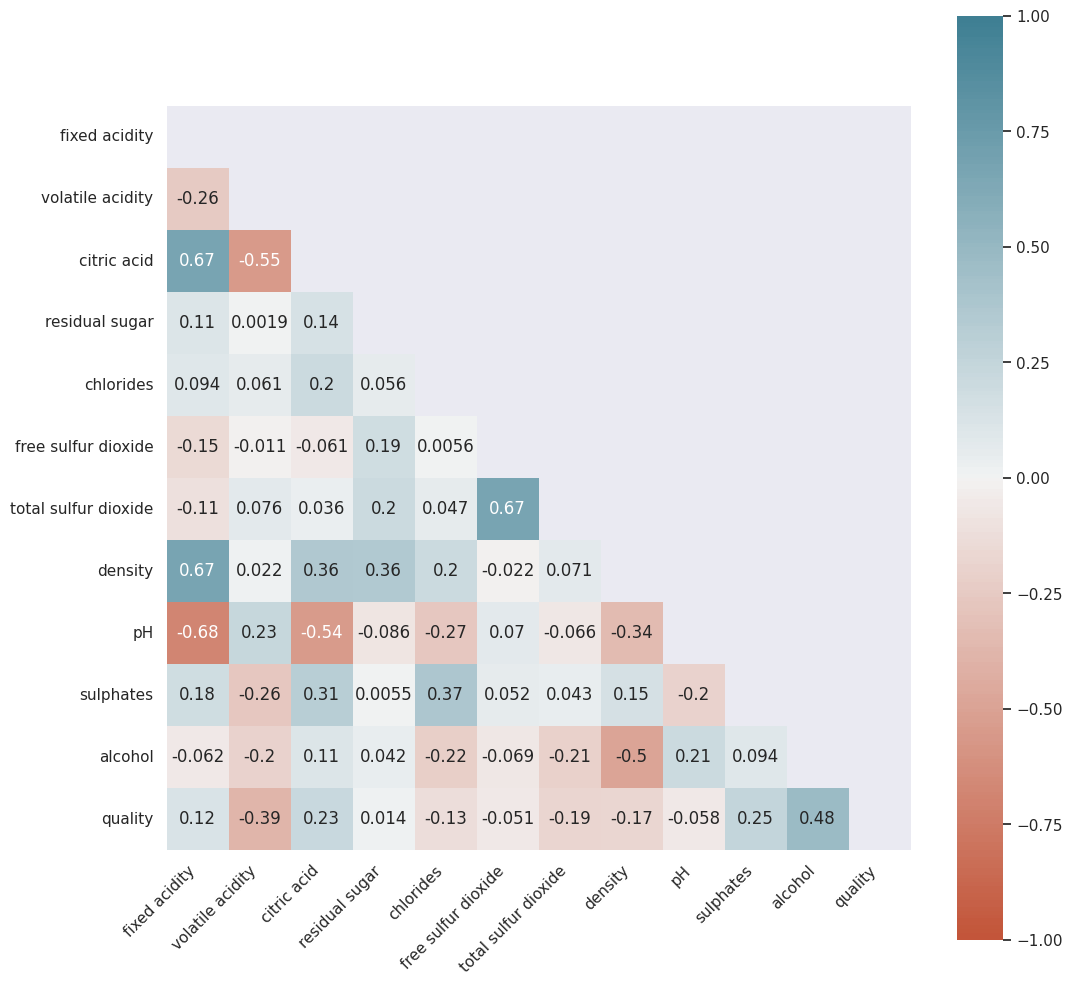

In [34]:
corr = wines_df.corr()

plt.figure(figsize = (12, 12))

mask = np.triu(np.ones_like(corr, dtype = bool))

heatmap = sns.heatmap(
  corr,
  vmin = -1,
  center = 0,
  vmax = 1,
  mask = mask,
  annot = True,
  square = True,
  cmap = sns.diverging_palette(20, 220, n = 200),
)

heatmap.set_xticklabels(
  heatmap.get_xticklabels(),
  rotation = 45,
  horizontalalignment = 'right'
)

In [3]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wines_df.shape

(1599, 12)

In [5]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


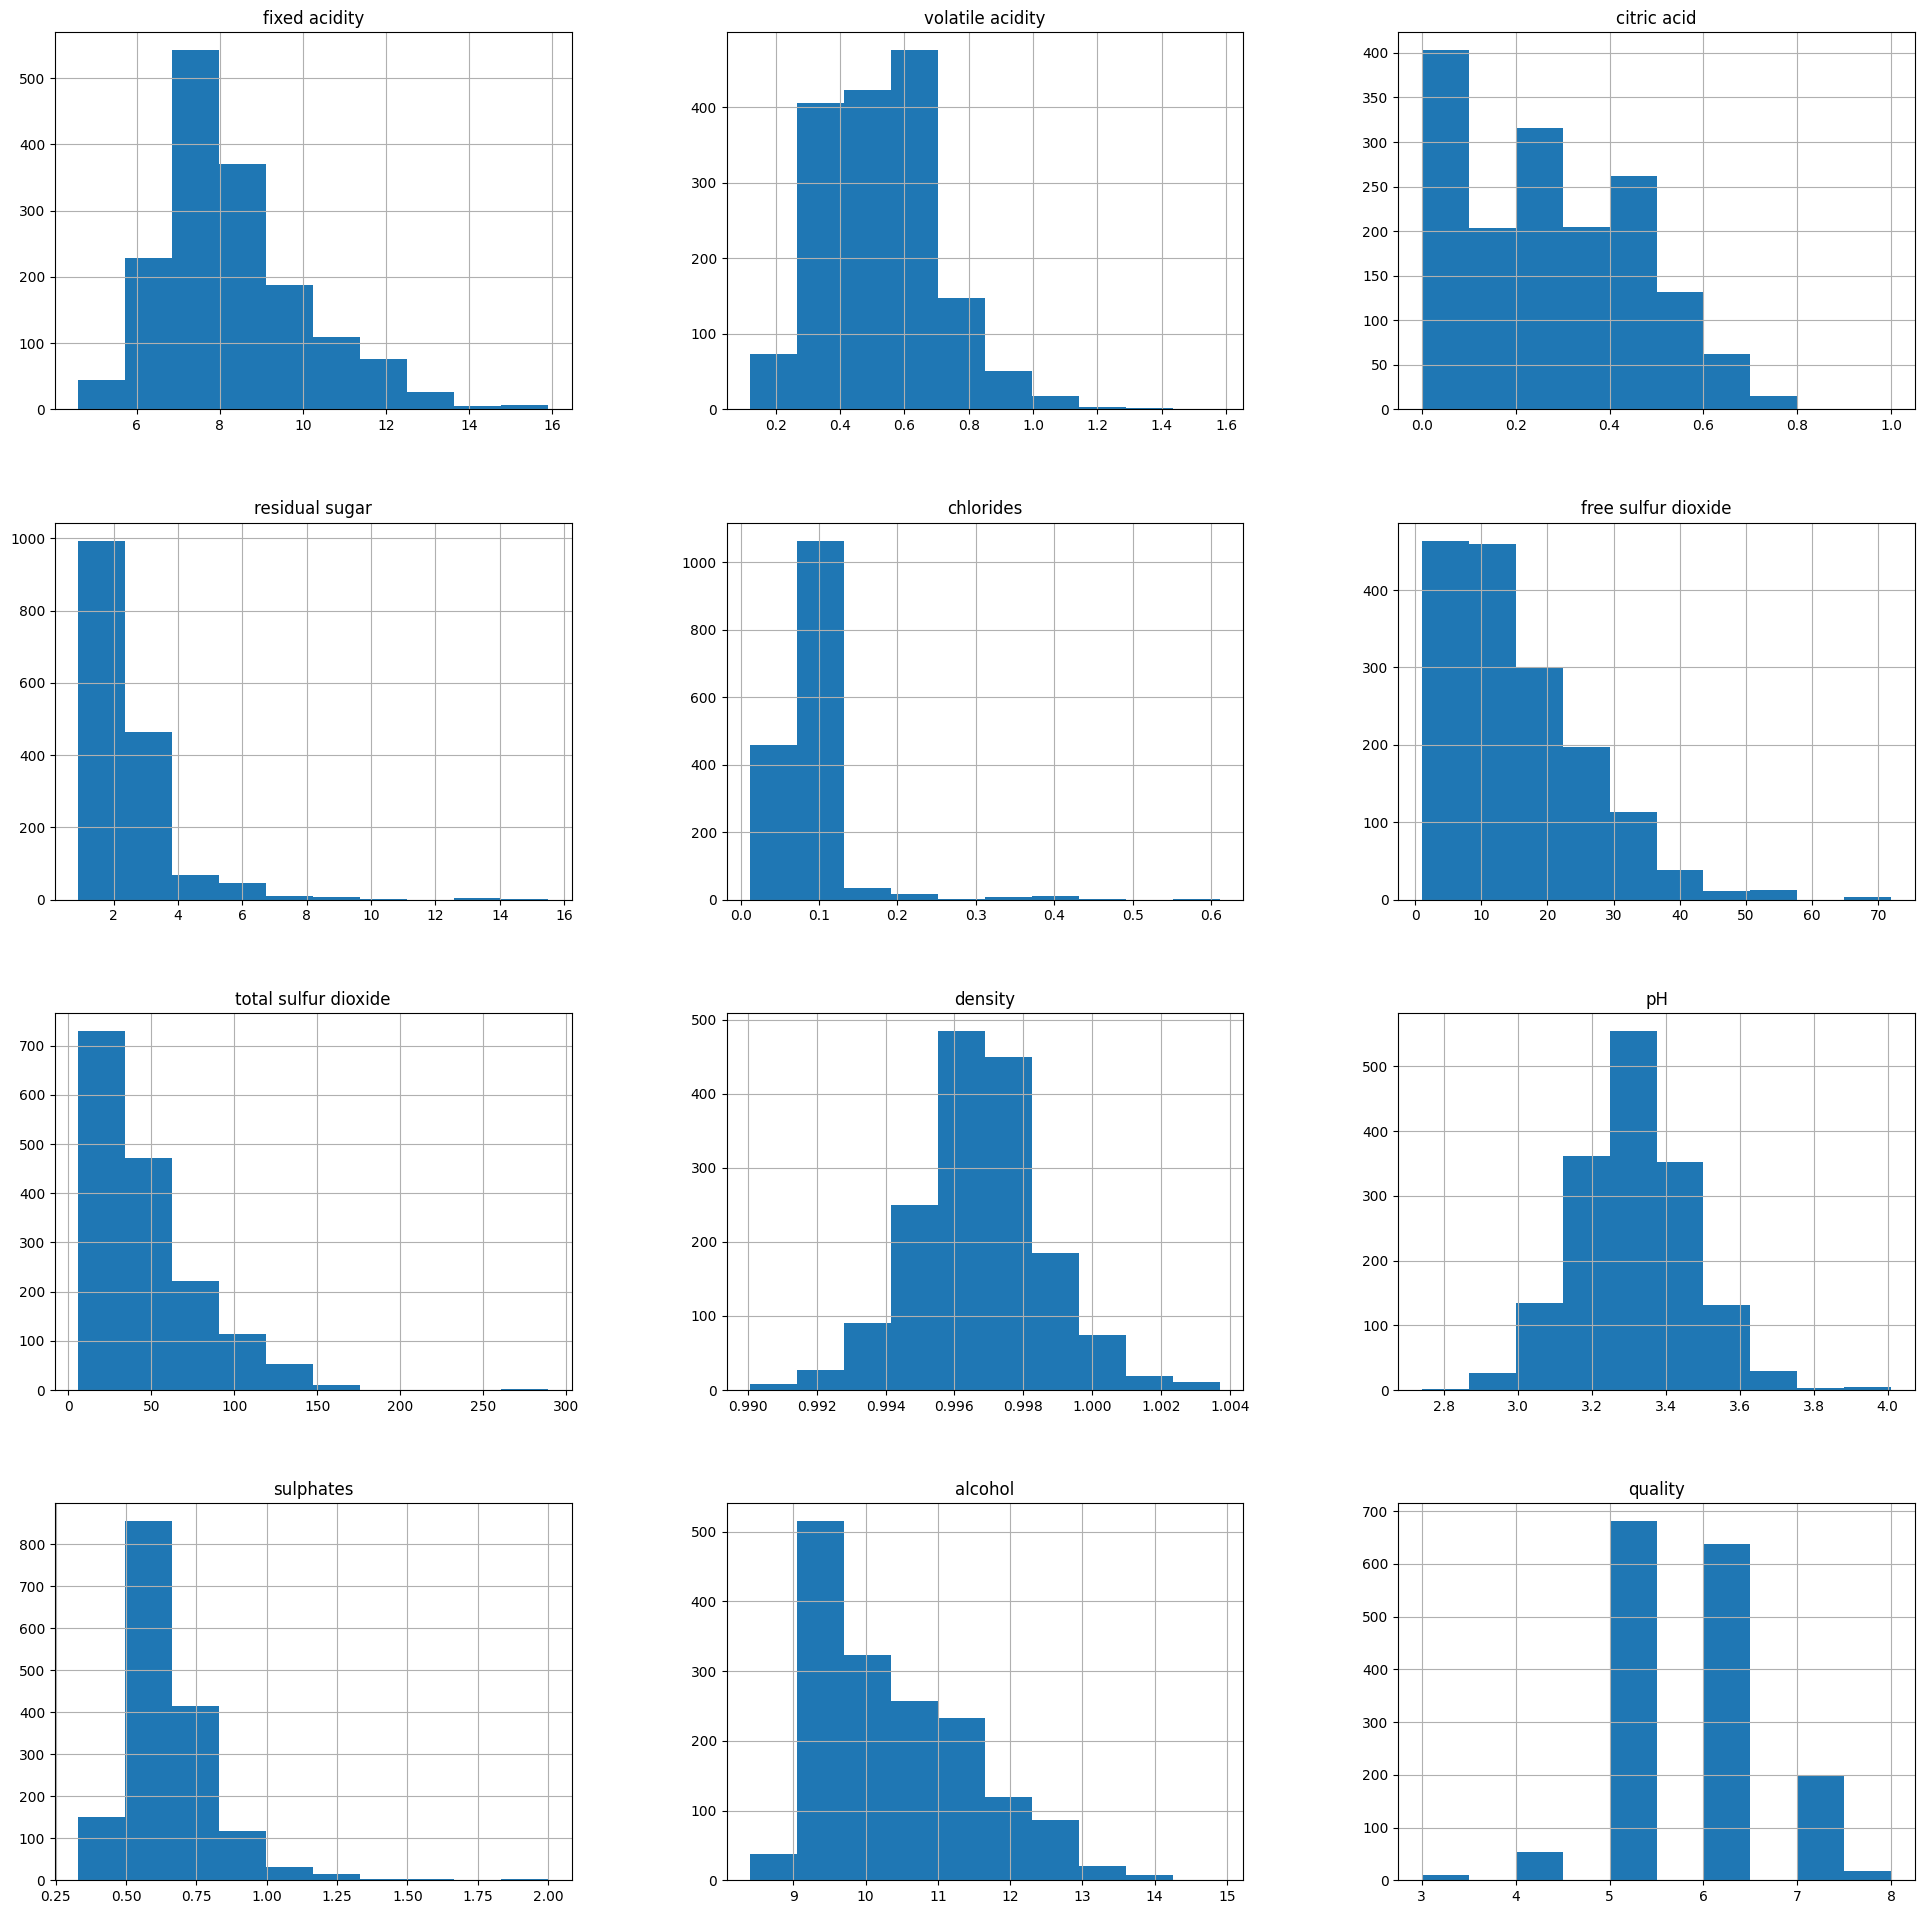

In [6]:
wines_df.hist(figsize=(24, 24))
plt.show()

In [8]:
wines_df.skew(axis = 0, skipna = True)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

residual sugar:


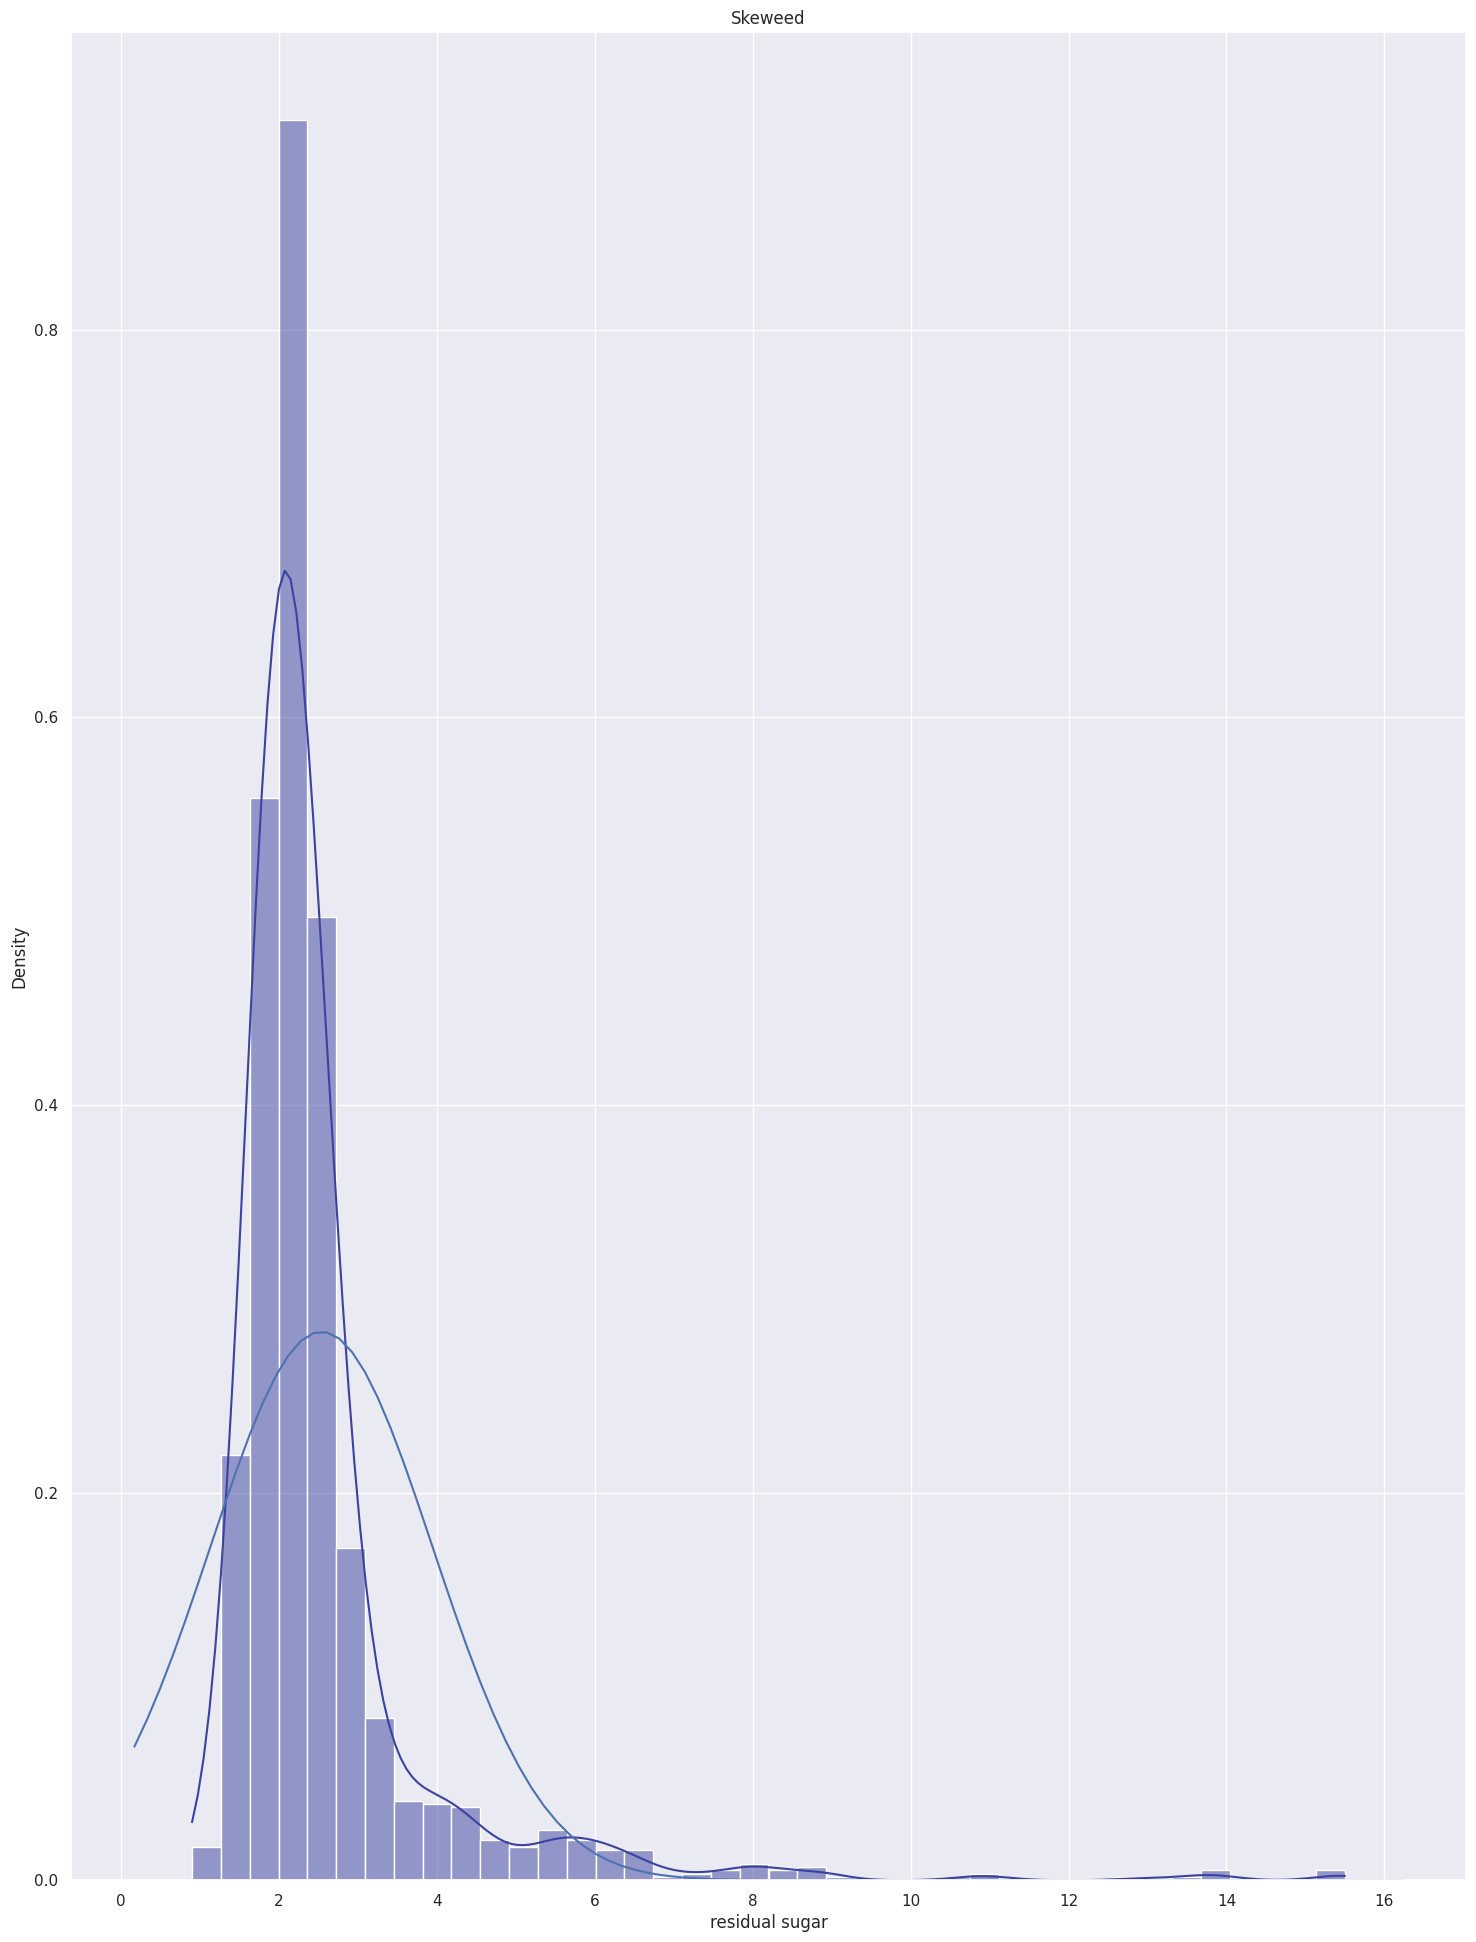

	mu: 2.53880550343965
	sigma: 1.4094871124880495


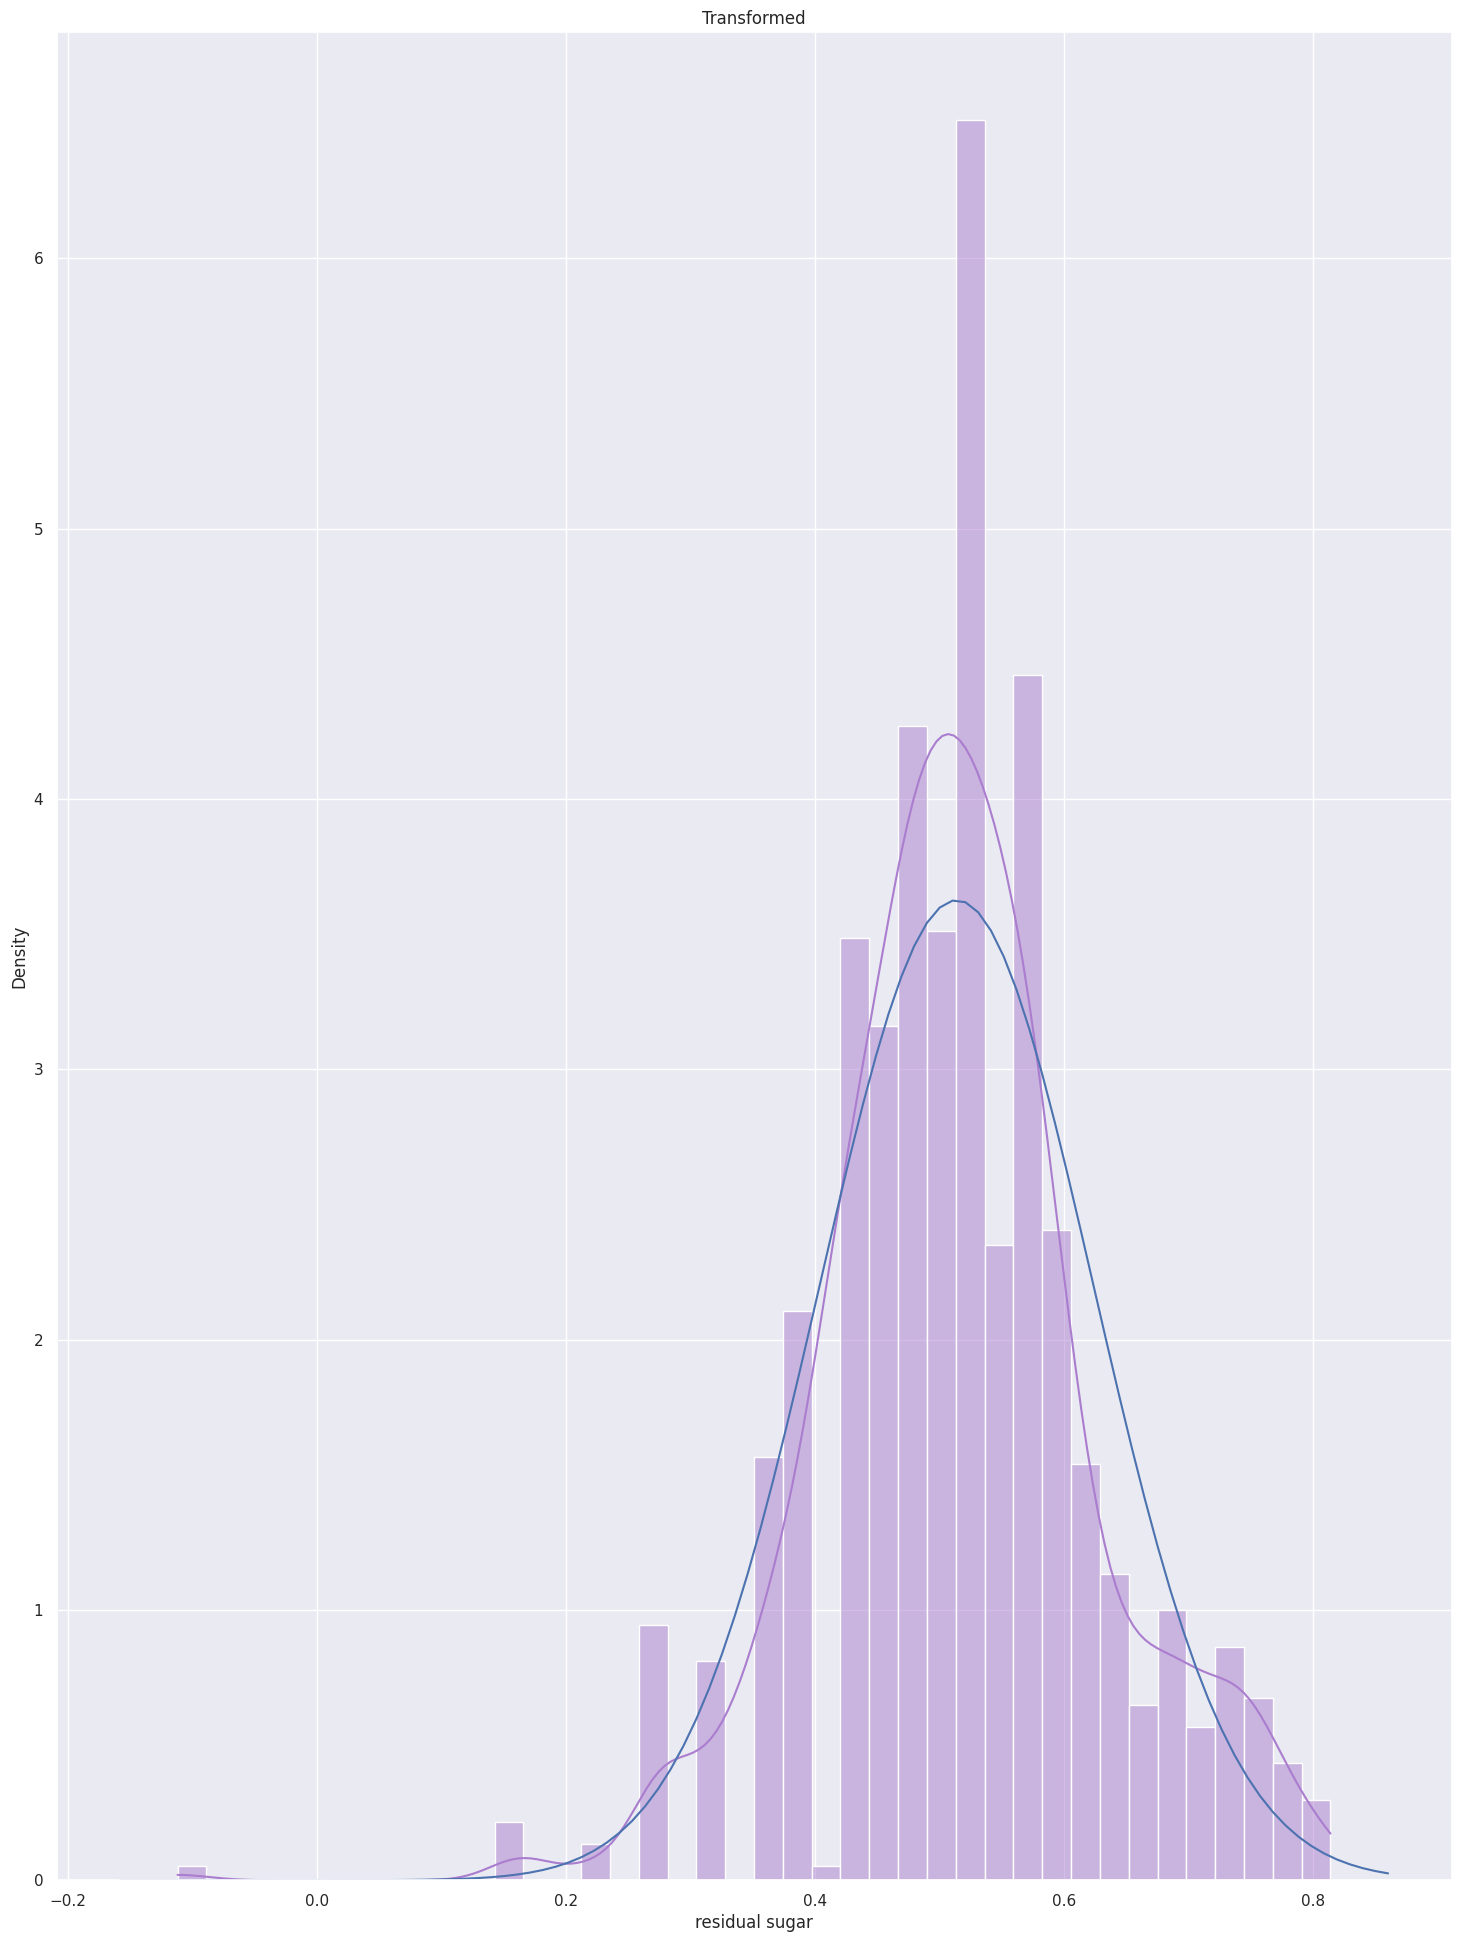

	mu: 0.5135558435839319
	sigma: 0.11004598444169933

#########################################################################
chlorides:


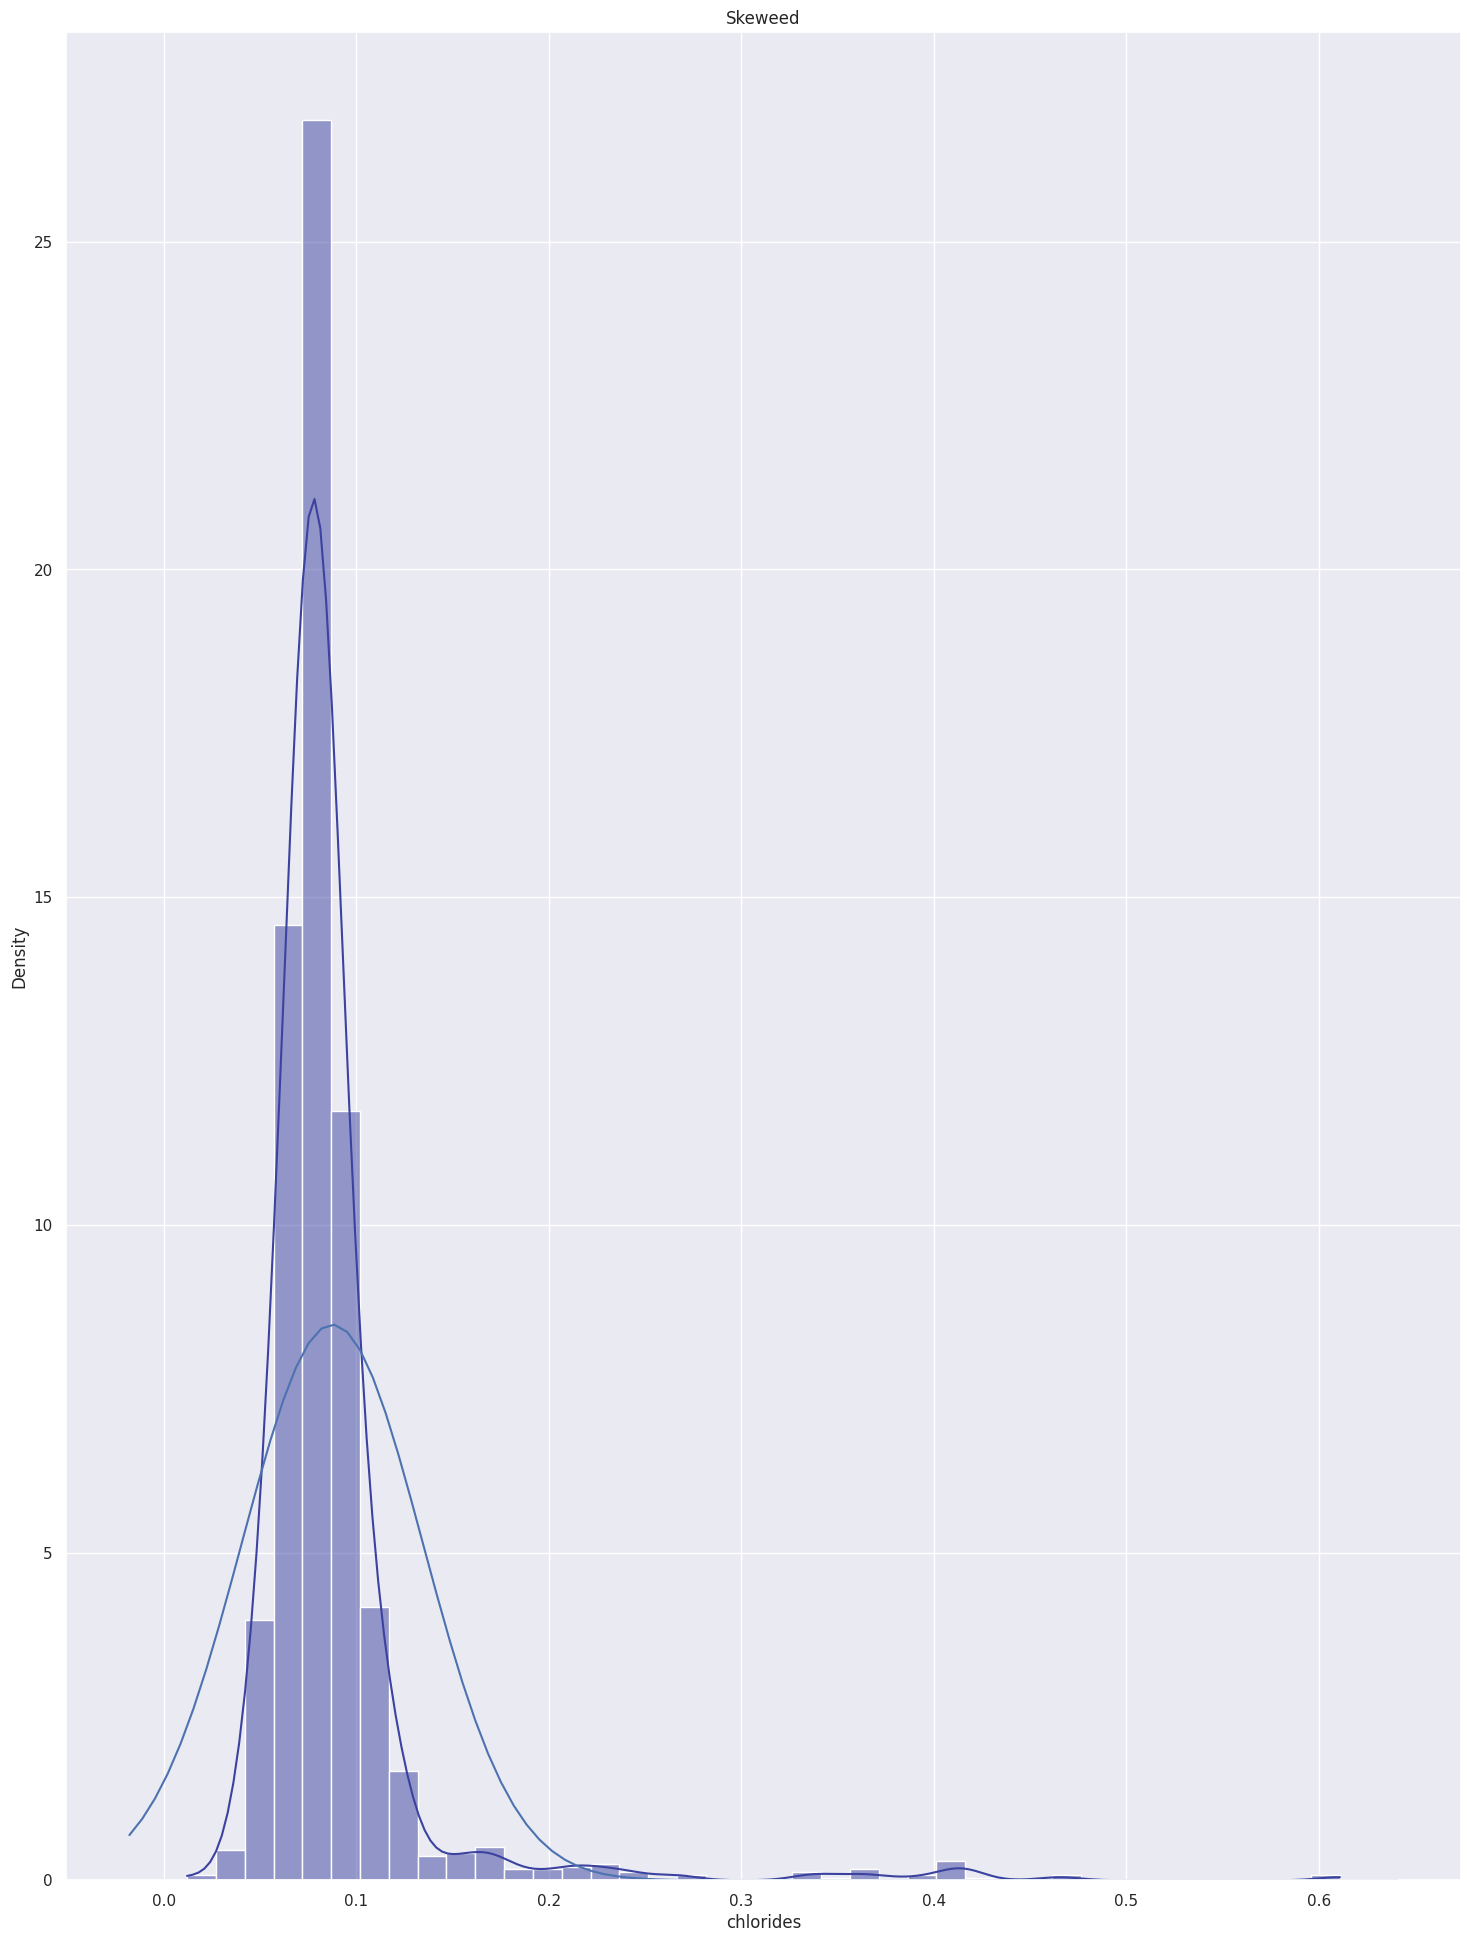

	mu: 0.08746654158849279
	sigma: 0.04705058260331571


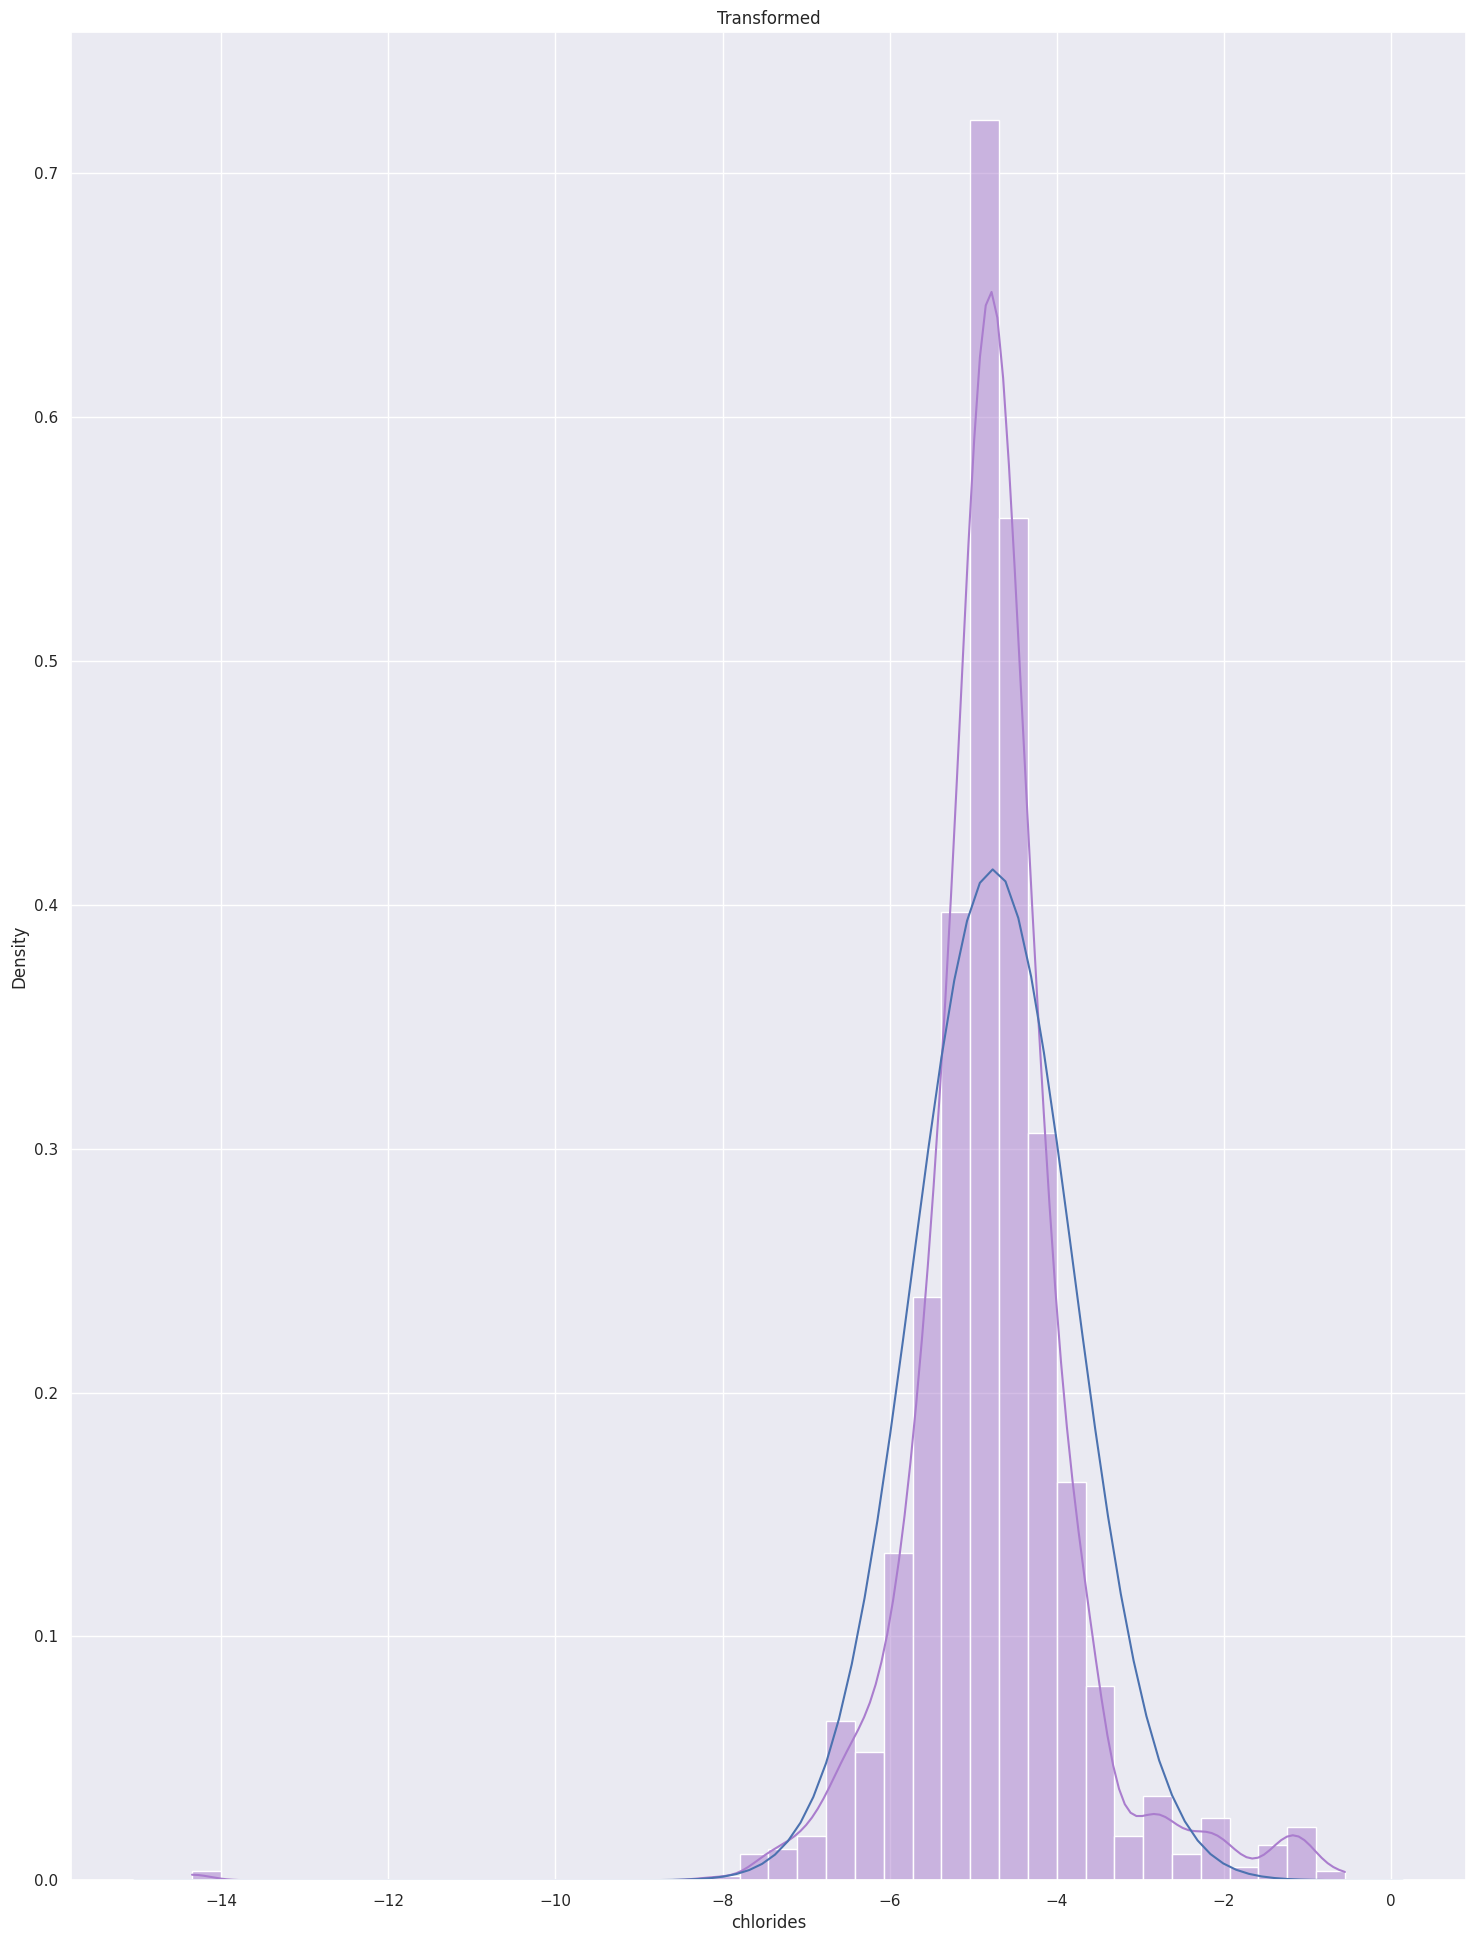

	mu: -4.763473789691171
	sigma: 0.9624685457110036

#########################################################################
free sulfur dioxide:


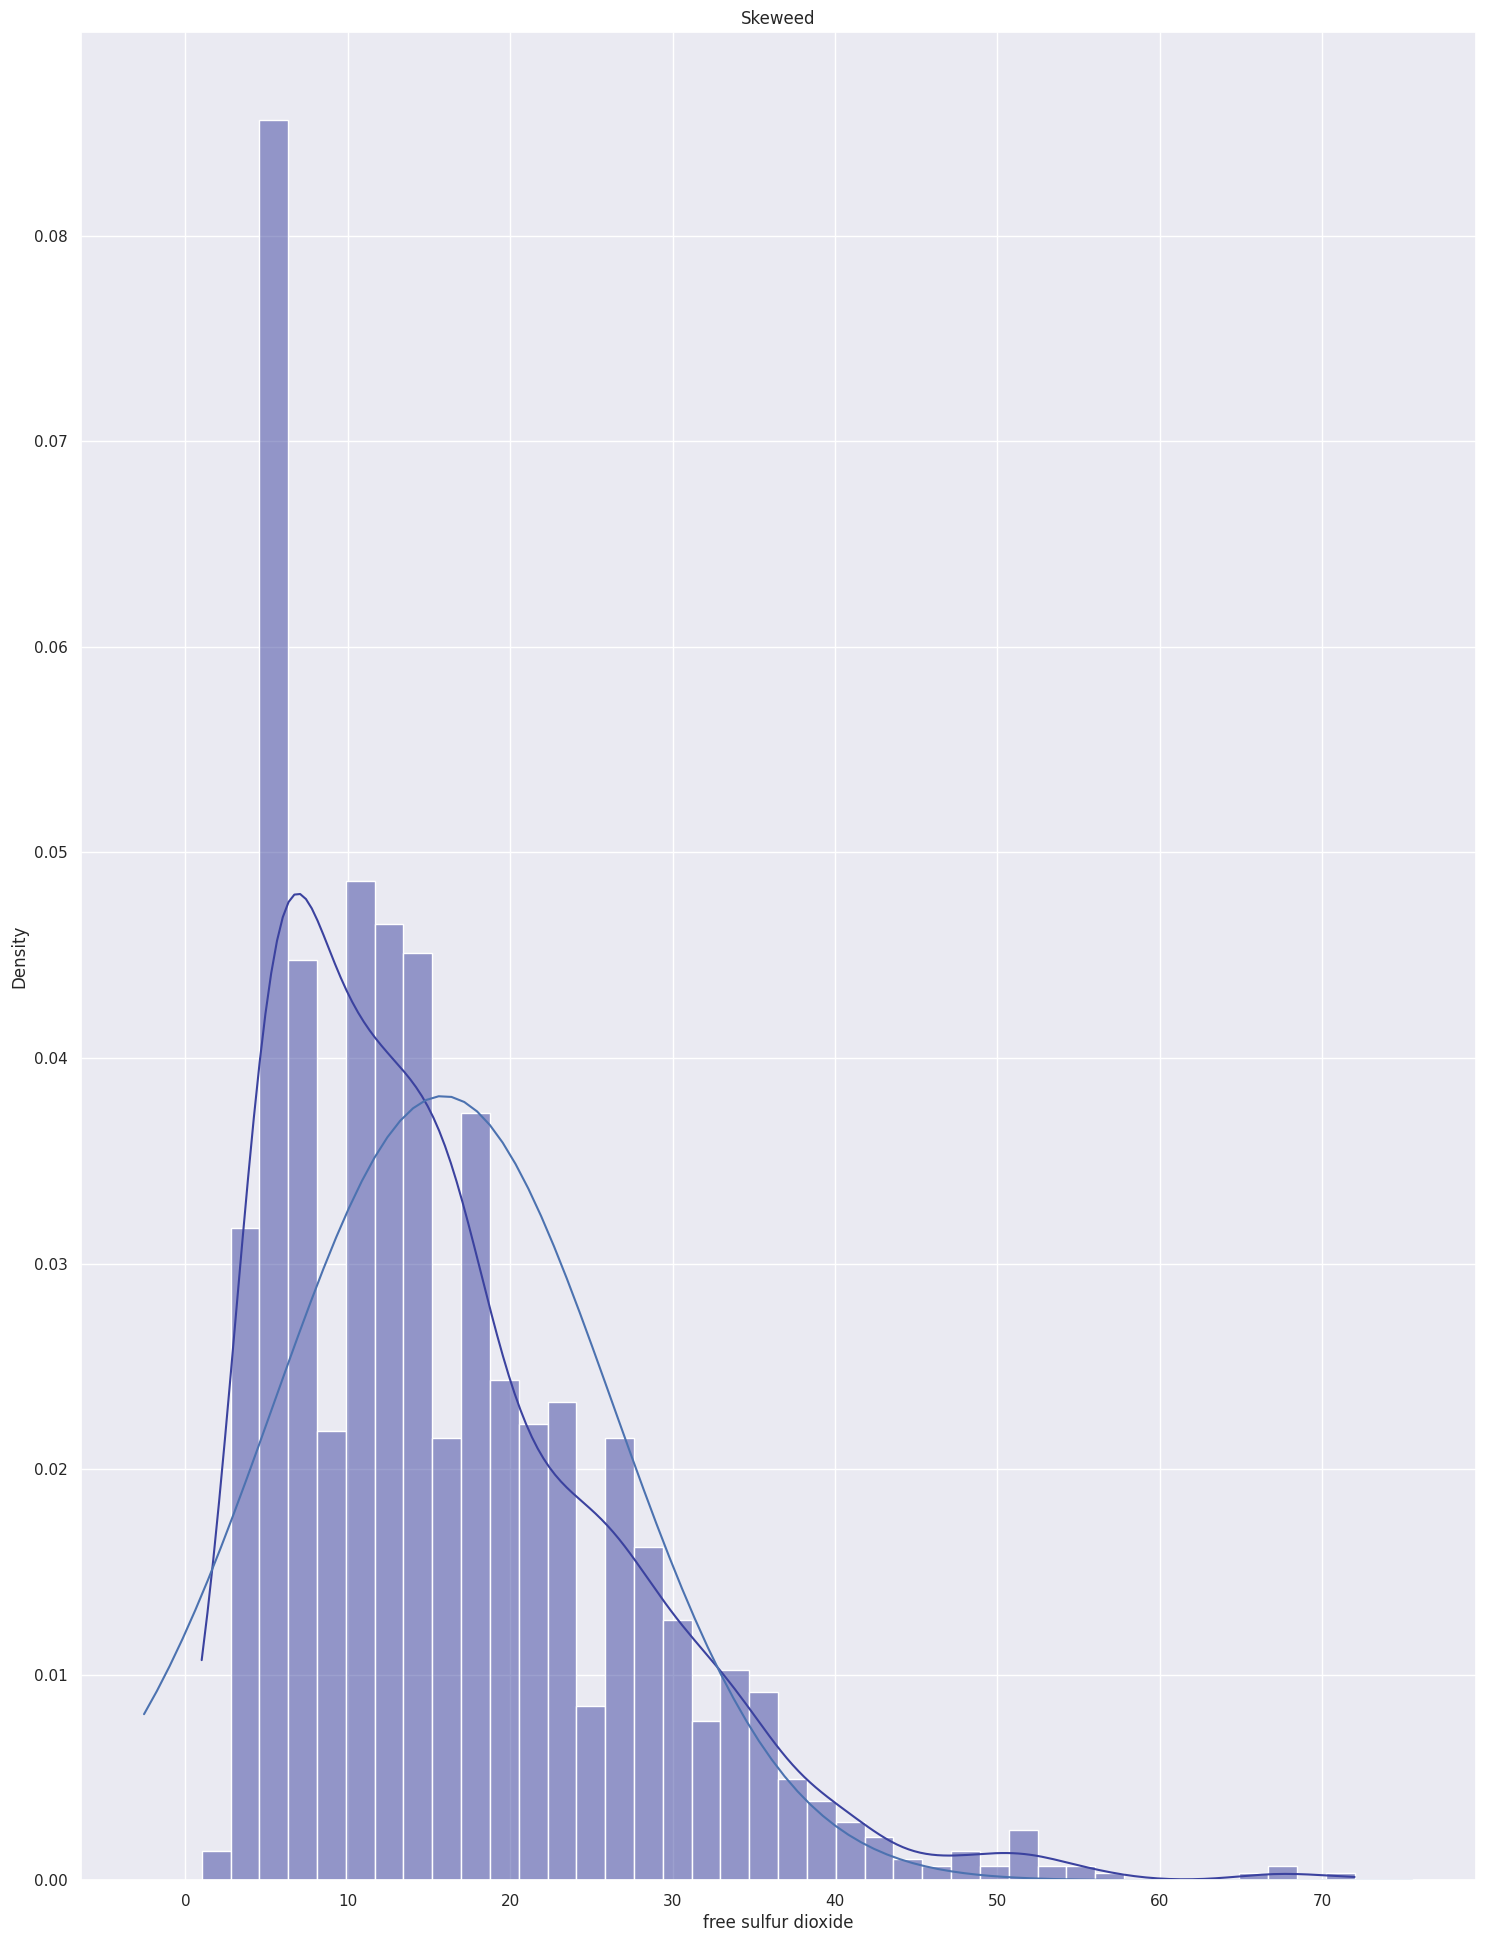

	mu: 15.874921826141339
	sigma: 10.45688561493072


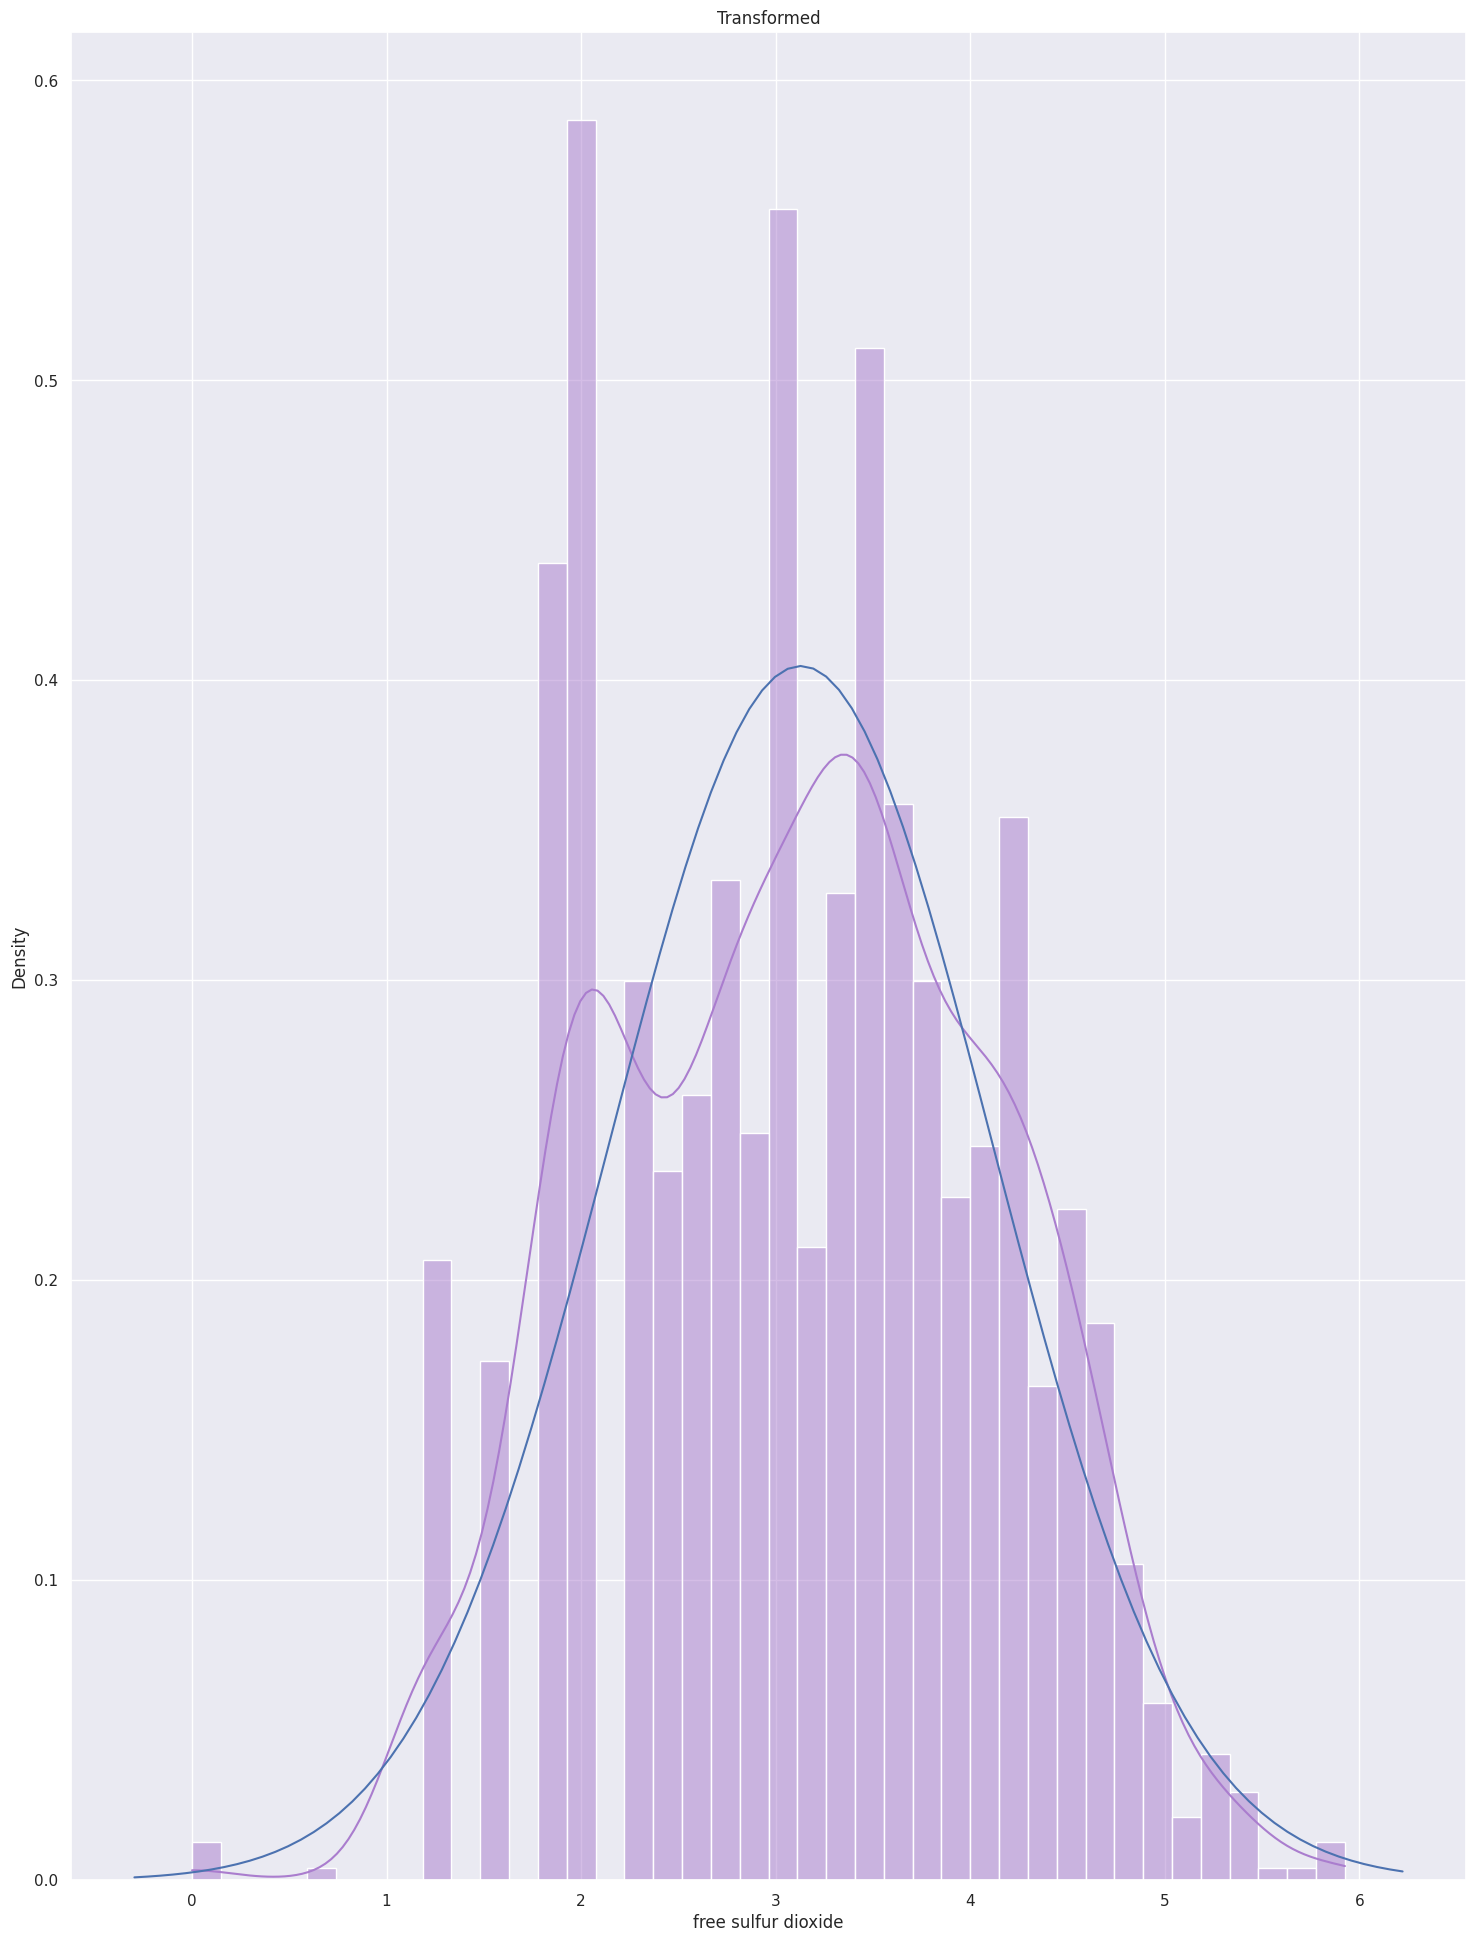

	mu: 3.1290485296425143
	sigma: 0.9855086968773705

#########################################################################
total sulfur dioxide:


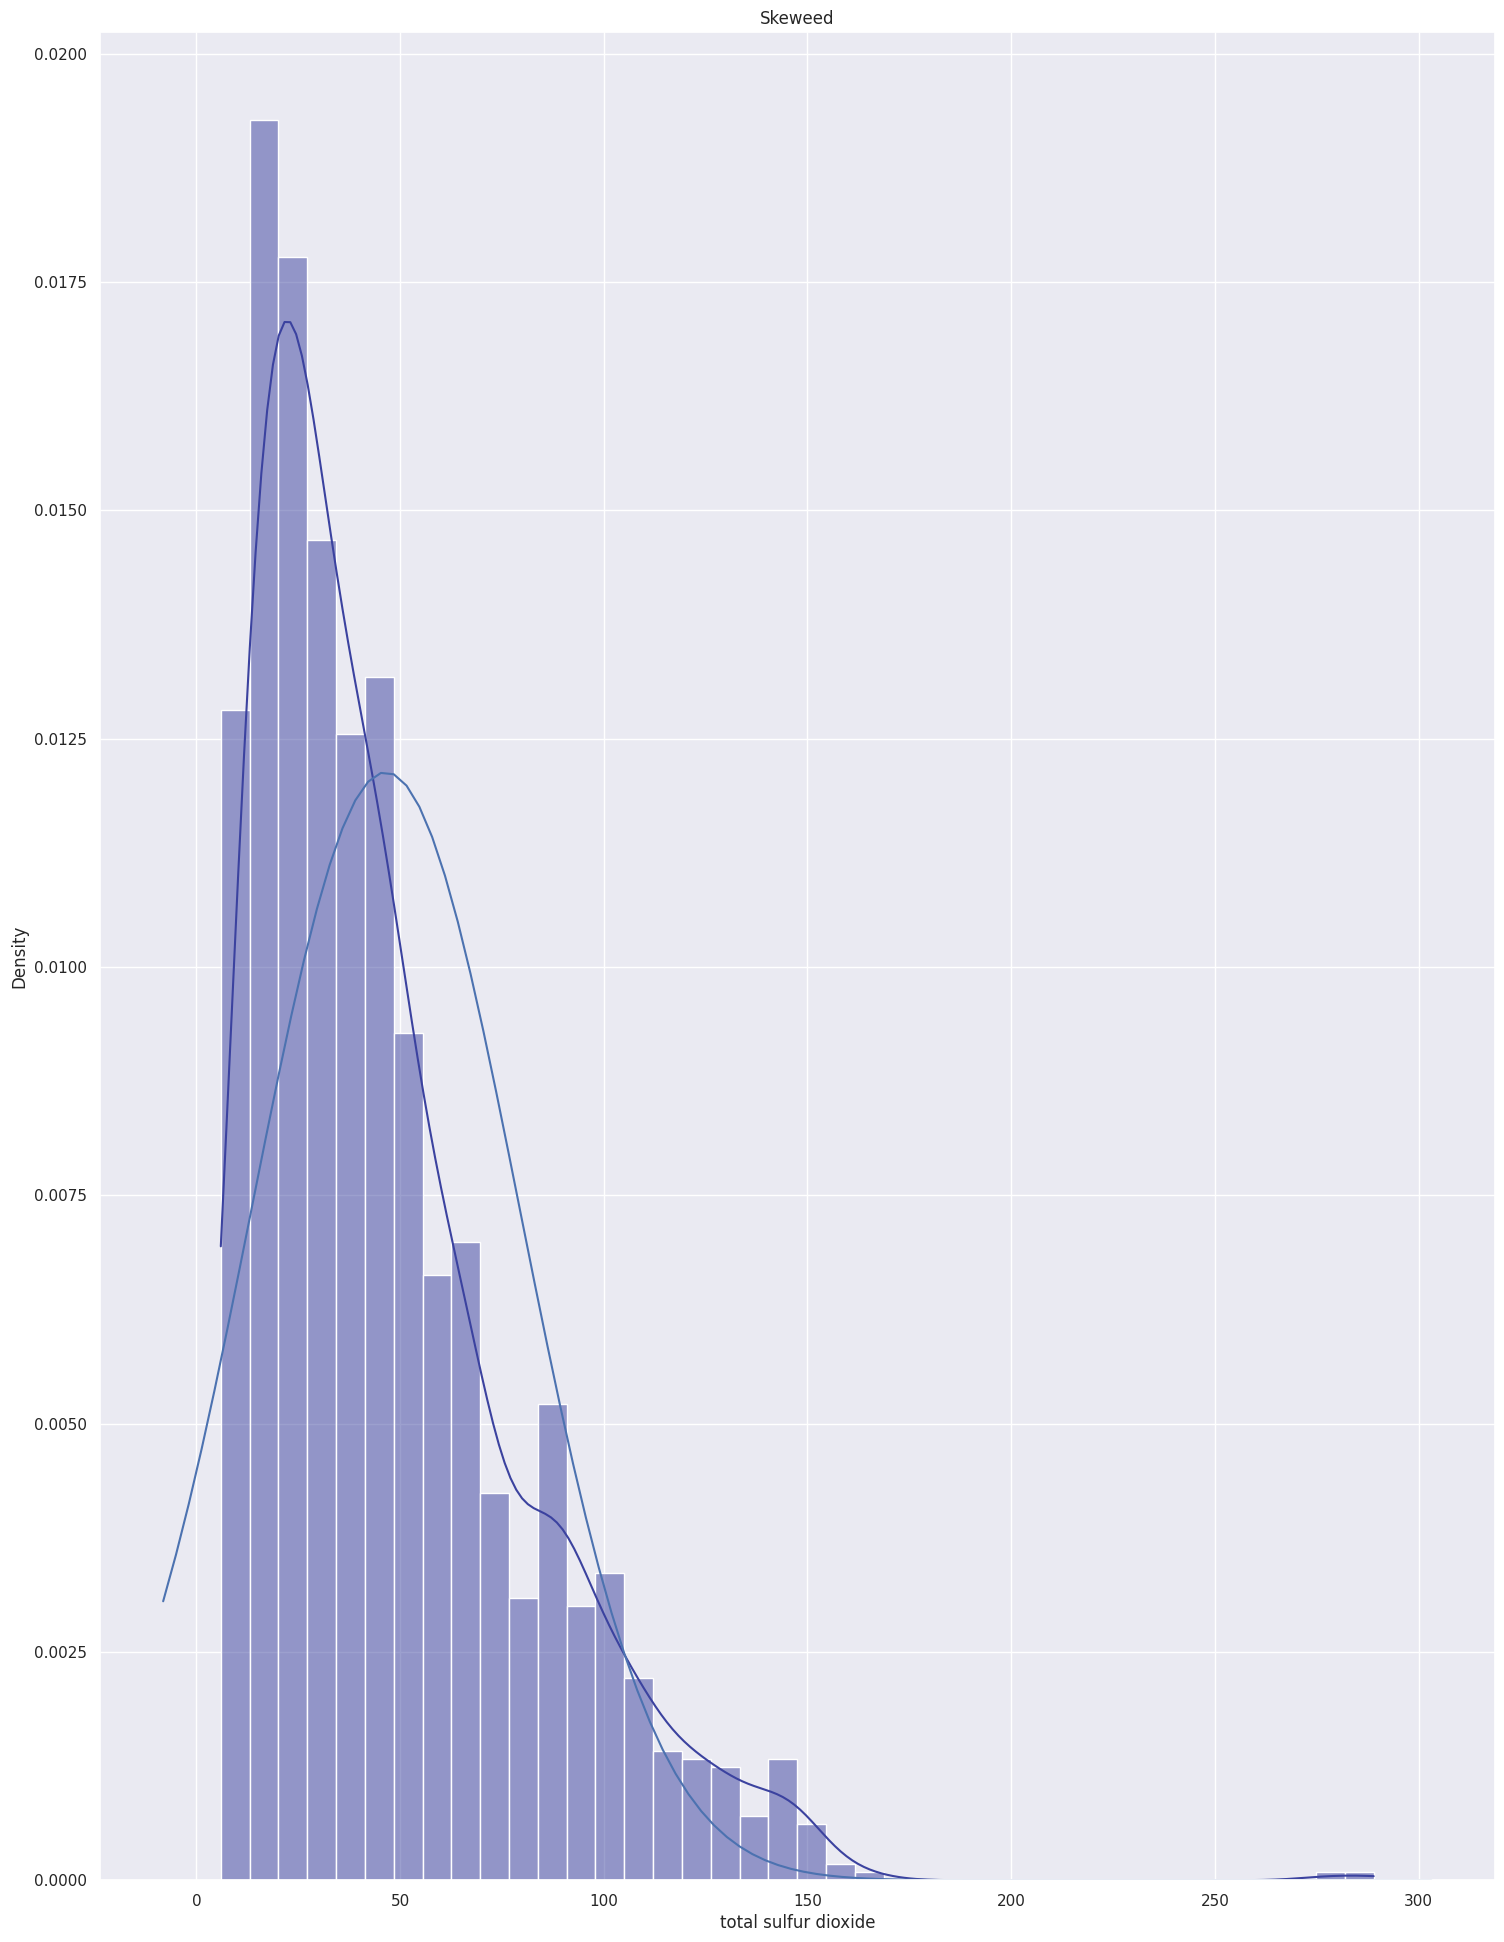

	mu: 46.46779237023139
	sigma: 32.88503665178374


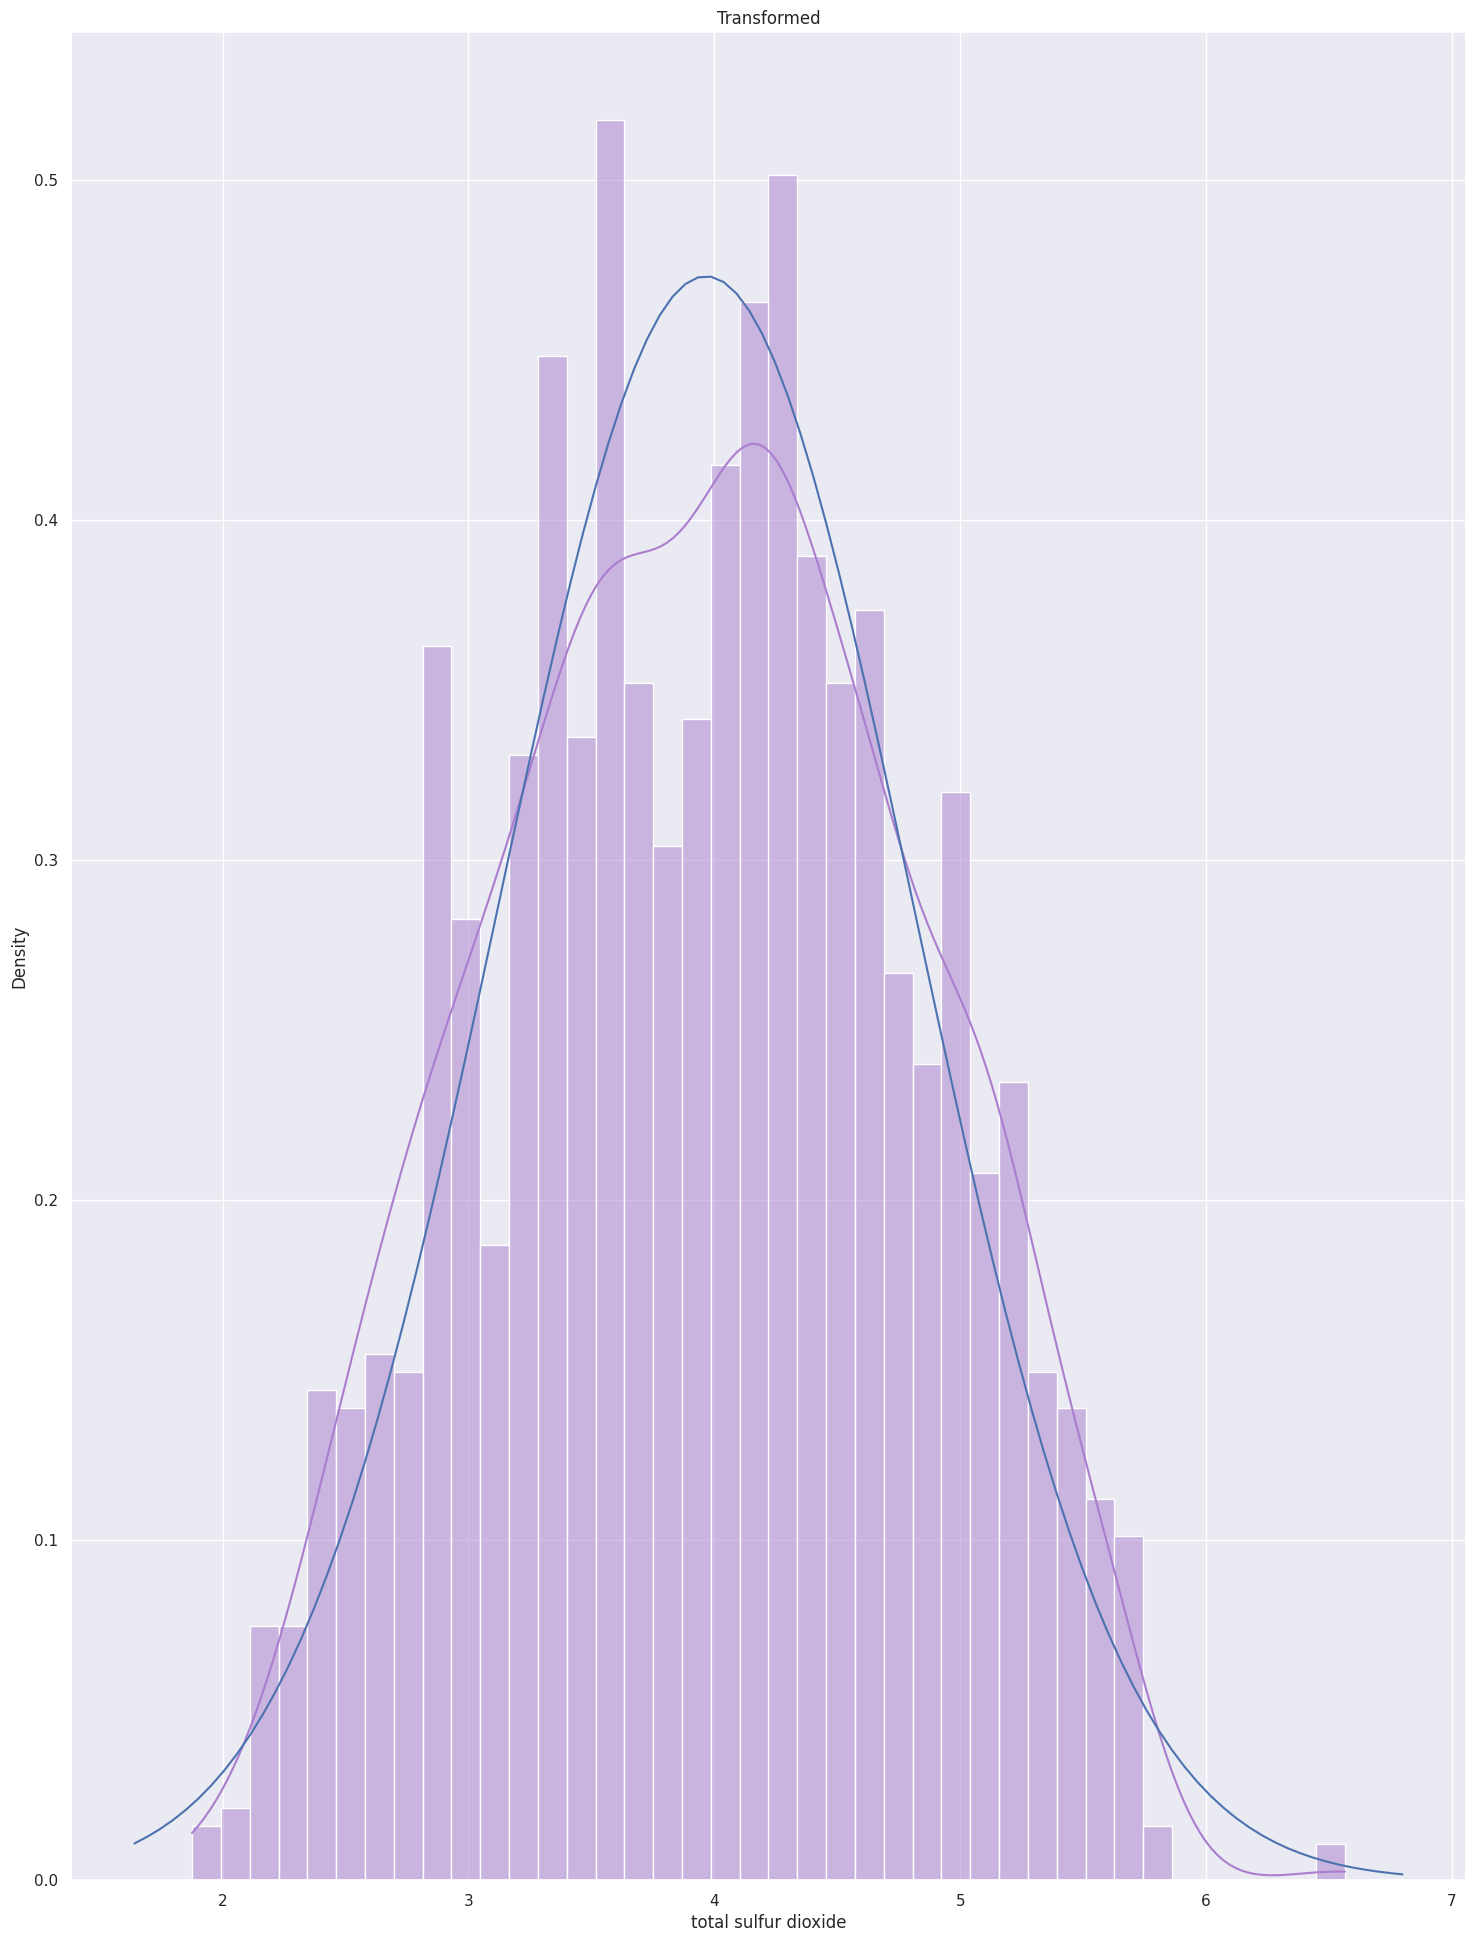

	mu: 3.9657192644535324
	sigma: 0.8459104716754929

#########################################################################
sulphates:


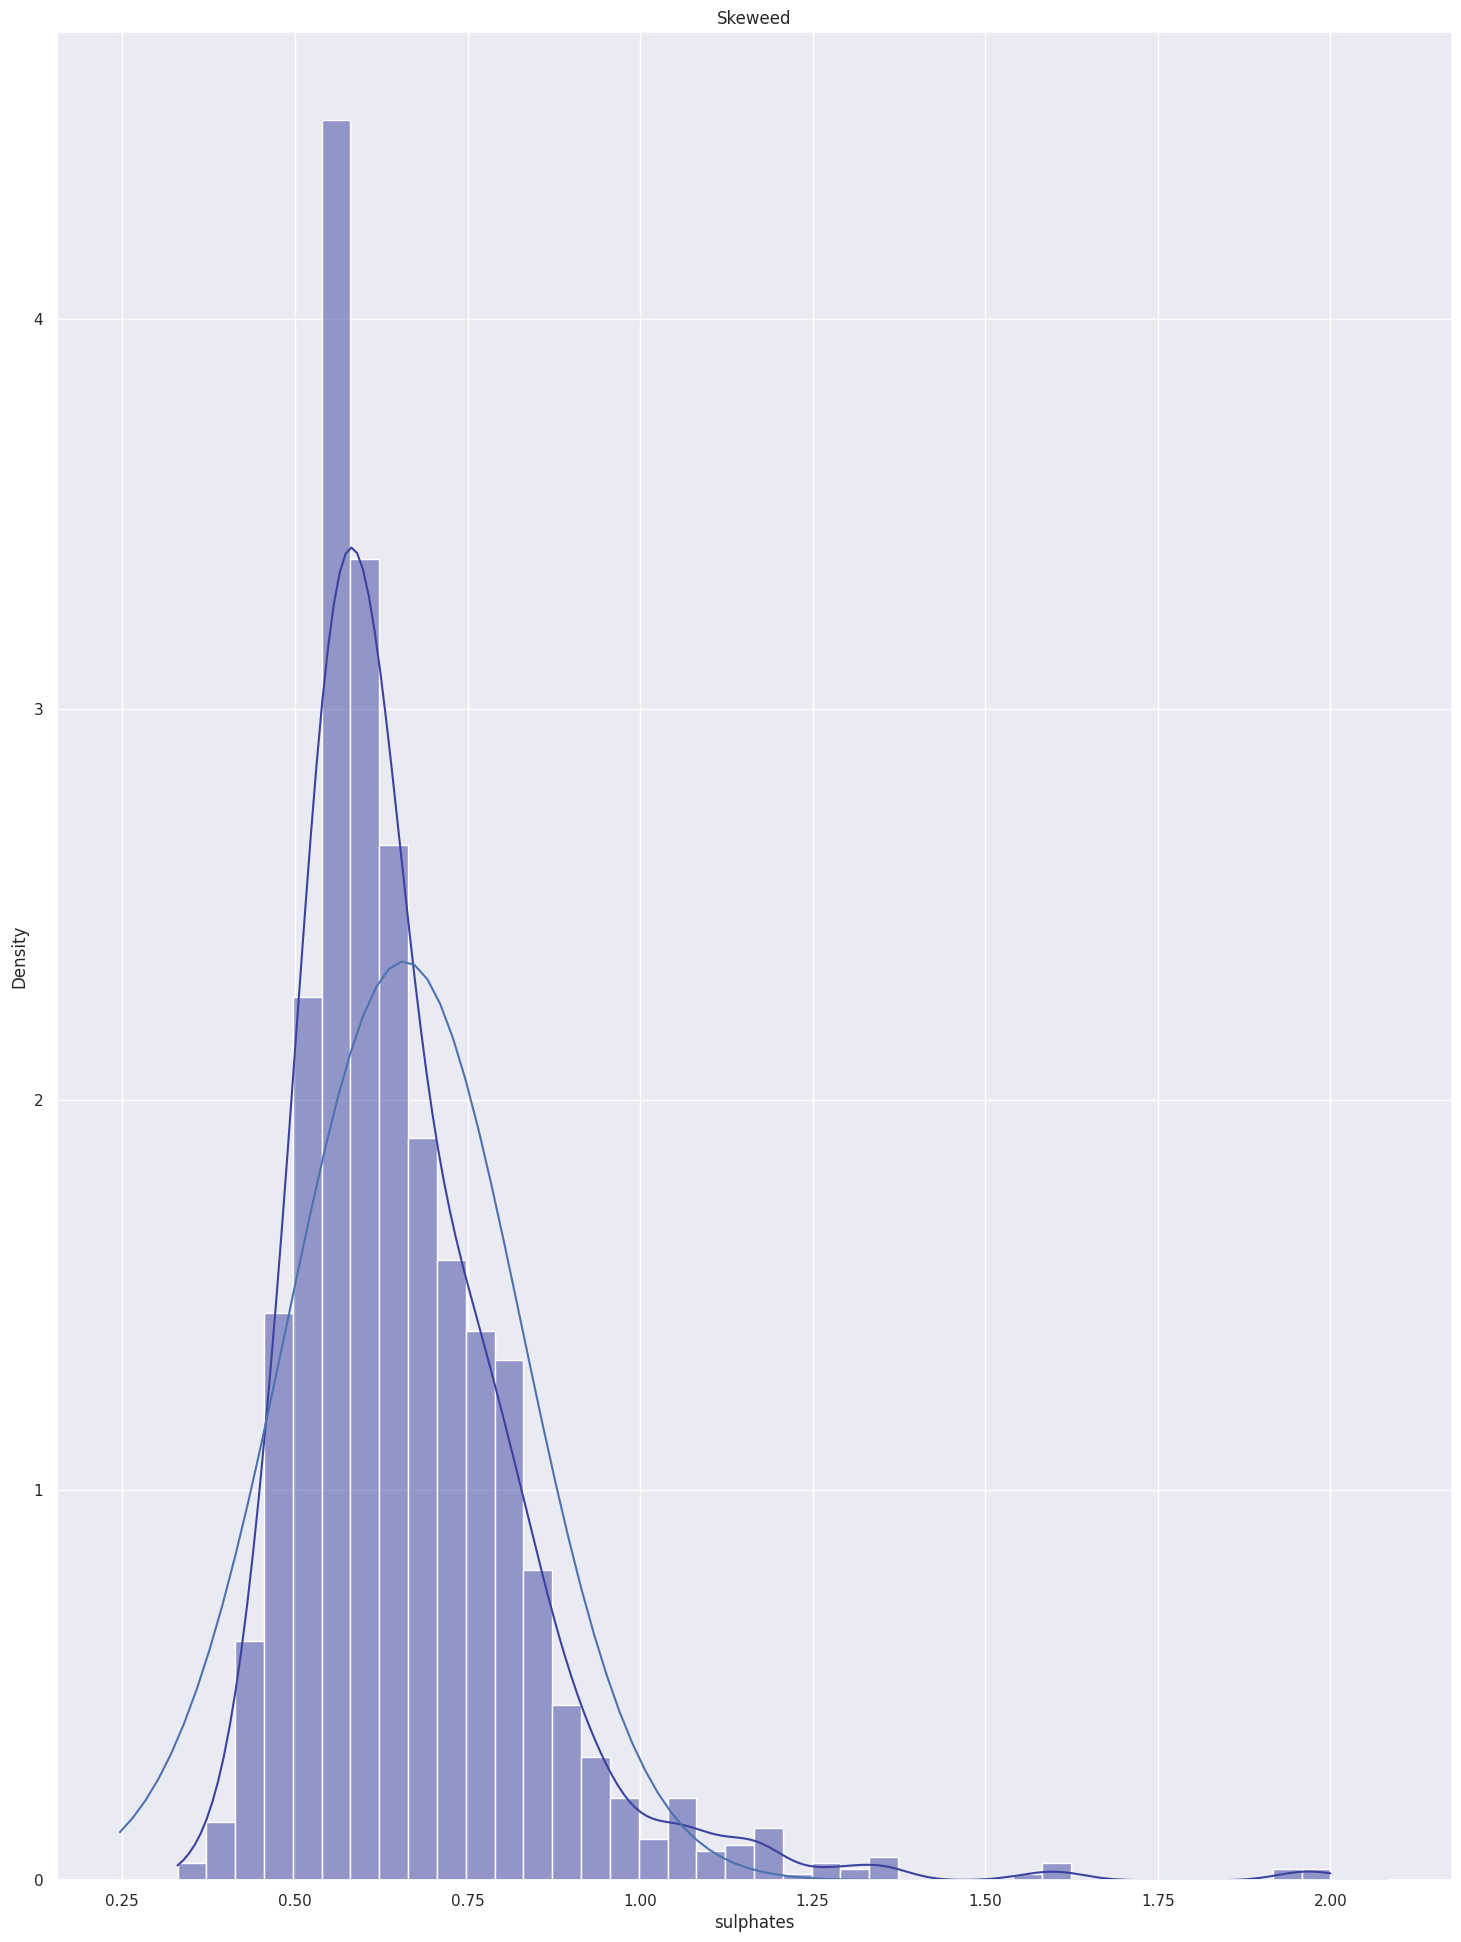

	mu: 0.6581488430268917
	sigma: 0.16945396724179546


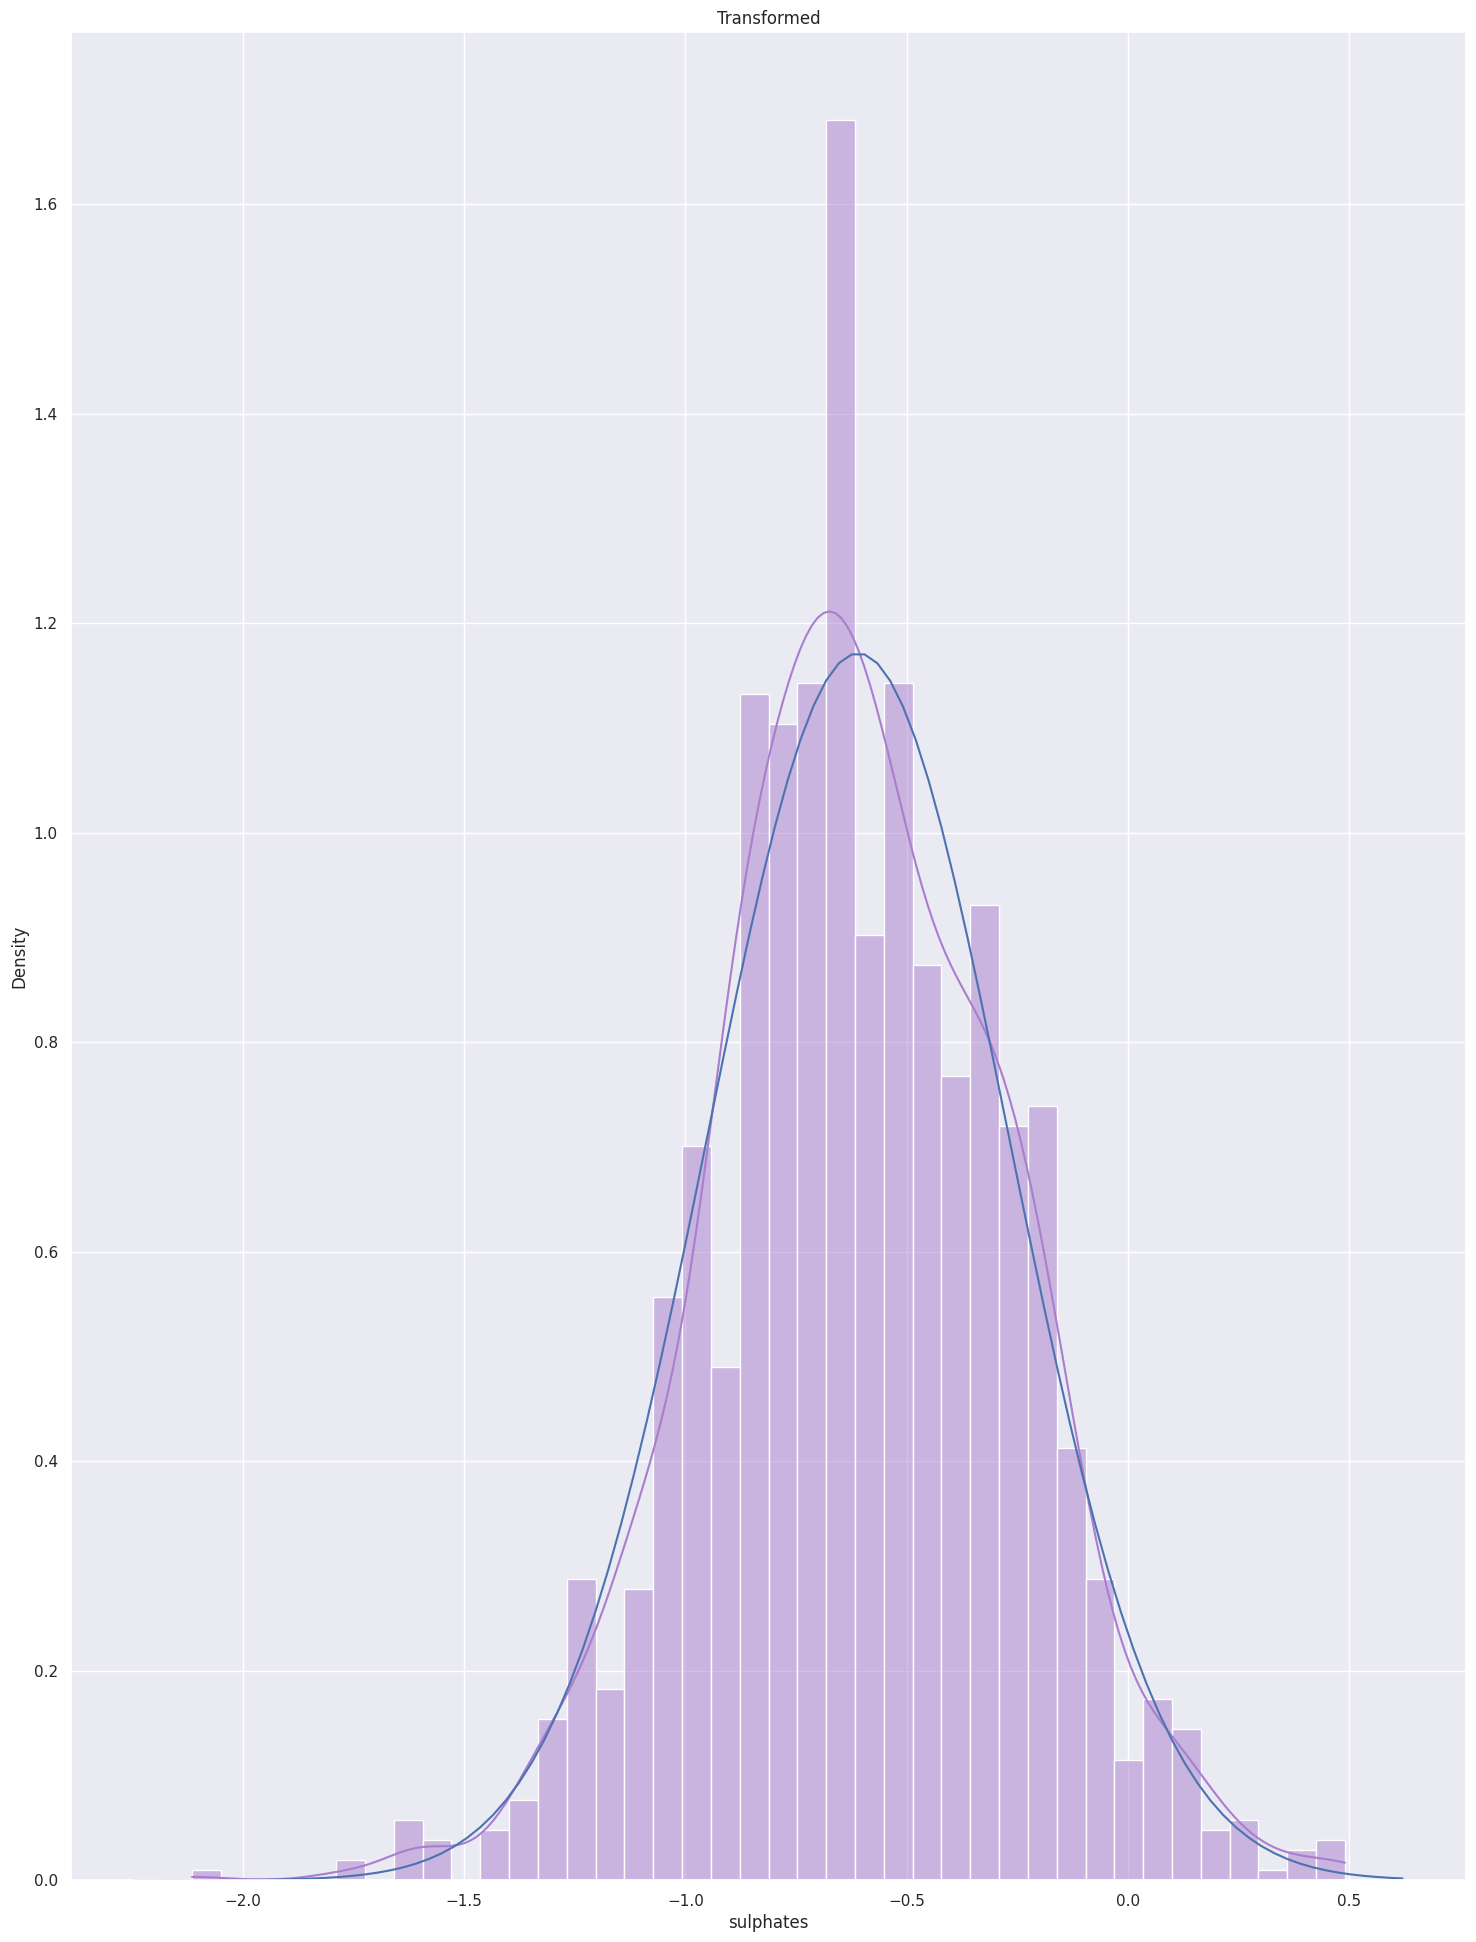

	mu: -0.6096631238347405
	sigma: 0.34058620296236386

#########################################################################


In [41]:
skews = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

wine_colors = ['#3B429F', '#AA7DCE', '#F5D7E3', '#F4A5AE', '#A8577E']
df = wines_df.copy()

for i in skews:
  print(f'{i}:')
  mu, sigma = norm.fit(df[i])
  sns.set_style('darkgrid')
  sk_plot = sns.histplot(
    df[i],
    kde = True,
    color = wine_colors[0],
    bins = 40, # type: ignore
    stat = 'density'
  )
  aux = np.linspace(*sk_plot.get_xlim(), 100) # type: ignore

  sk_plot.plot(aux, norm.pdf(aux, mu, sigma))
  plt.title('Skeweed')
  plt.show()
  print(f'\tmu: {mu}')
  print(f'\tsigma: {sigma}')

  df[i], lam = boxcox(df[i])  # type: ignore
  mu, sigma = norm.fit(df[i])
  sns.set_style('darkgrid')
  norm_plot = sns.histplot(
    df[i],
    kde = True,
    color = wine_colors[1],
    bins = 40, # type: ignore
    stat = 'density'
  )
  aux = np.linspace(*norm_plot.get_xlim(), 100) # type: ignore
  norm_plot.plot(aux, norm.pdf(aux, mu, sigma))
  plt.title('Transformed')
  plt.show()
  print(f'\tmu: {mu}')
  print(f'\tsigma: {sigma}')
  print('\n#########################################################################')

In [10]:
wines_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='count'>

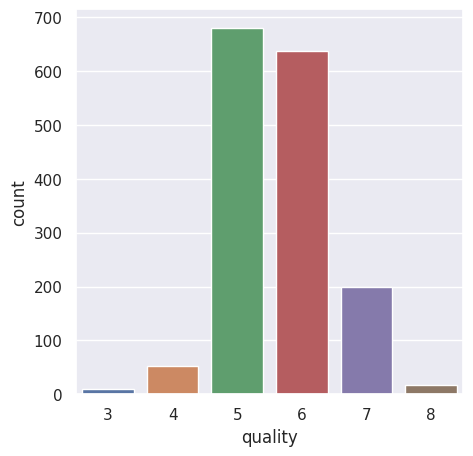

In [11]:
sns.set(rc = { 'figure.figsize': (5, 5) })
sns.countplot(x = wines_df['quality'])

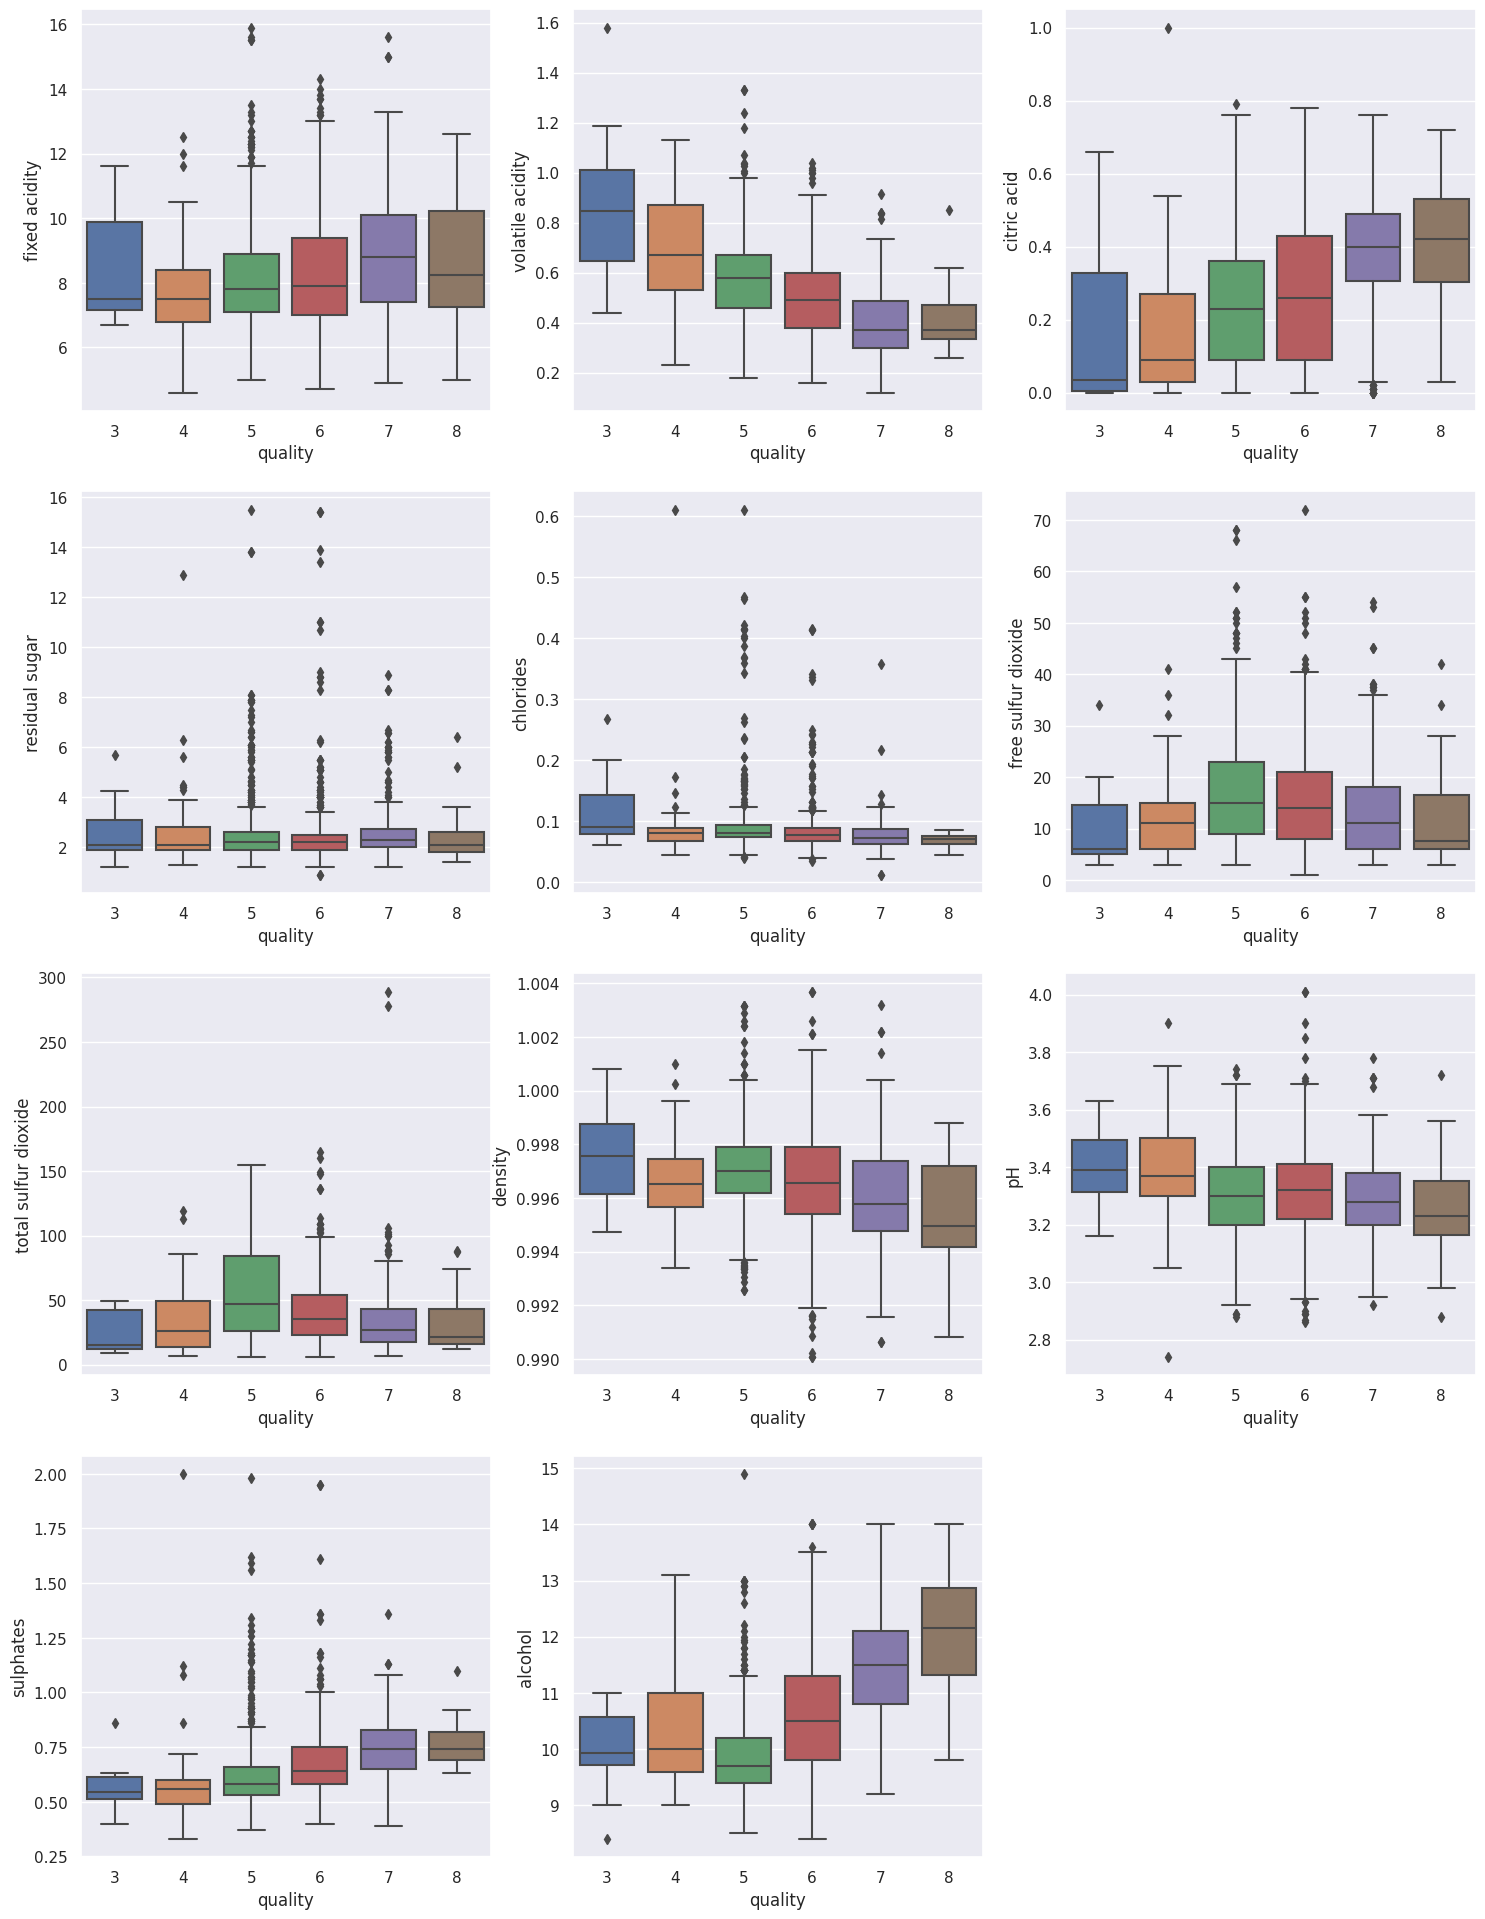

In [35]:
sns.set(rc = { 'figure.figsize': (18, 24) })
fig, axes = plt.subplots(4, 3)

sns.boxplot(
  x = 'quality',
  y = 'fixed acidity',
  data = wines_df,
  ax = axes[0][0]
)
sns.boxplot(
  x = 'quality',
  y = 'volatile acidity',
  data = wines_df,
  ax = axes[0][1]
)
sns.boxplot(
  x = 'quality',
  y = 'citric acid',
  data = wines_df,
  ax = axes[0][2]
)
sns.boxplot(
  x = 'quality',
  y = 'residual sugar',
  data = wines_df,
  ax = axes[1][0]
)
sns.boxplot(
  x = 'quality',
  y = 'chlorides',
  data = wines_df,
  ax = axes[1][1]
)
sns.boxplot(
  x = 'quality',
  y = 'free sulfur dioxide',
  data = wines_df,
  ax = axes[1][2]
)
sns.boxplot(
  x = 'quality',
  y = 'total sulfur dioxide',
  data = wines_df,
  ax = axes[2][0]
)
sns.boxplot(
  x = 'quality',
  y = 'density',
  data = wines_df,
  ax = axes[2][1]
)
sns.boxplot(
  x = 'quality',
  y = 'pH',
  data = wines_df,
  ax = axes[2][2]
)
sns.boxplot(
  x = 'quality',
  y = 'sulphates',
  data = wines_df,
  ax = axes[3][0]
)
sns.boxplot(
  x = 'quality',
  y = 'alcohol',
  data = wines_df,
  ax = axes[3][1]
)

fig.delaxes(axes[3][2])

In [28]:
X = wines_df.iloc[:, 0:11]
target = wines_df['quality'].to_numpy()

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [29]:
X_st = StandardScaler().fit_transform(X)
X_st

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [31]:
pca_out = PCA().fit(X_st)

loadings = pca_out.components_
loadings

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [32]:
pca_out.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

In [33]:
pca_scores = PCA().fit_transform(X_st)
pca_scores

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [42]:
fig = go.Figure(px.box(wines_df, y = 'alcohol', title = 'Box Plot Alcohol'))
fig.update_layout(title_x = 0.5)
fig.show()

In [43]:
fig = go.Figure(px.histogram(wines_df, x = 'pH', title = 'Histogram of pH'))
fig.update_layout(title_x = 0.5)
fig.show()